# 1. 서울시에서 공개한 코로나19 발생동향 분석
* https://www.seoul.go.kr/coronaV/coronaStatus.do

In [1]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np

**[1/25] 판다스 단 한 줄로 서울시 코로나19 발생동향 크롤링하기**

In [2]:
# 크롤링으로 가져올 url 주소를 입력합니다.
url = "https://www.seoul.go.kr/coronaV/coronaStatus.do"
url

'https://www.seoul.go.kr/coronaV/coronaStatus.do'

In [457]:
# 판다스의 read_html 을 통해 위 url을 불러옵니다.
table = pd.read_html(url)
len(table)

5

In [458]:
# read_html 은 사이트 내의 html 태그를 불러옵니다.
# 행과 열 바꾸기
#table[0].T
table[0].transpose()

,0,1,2
종로구,94,마포구,181
중구,64,양천구,187
용산구,142,강서구,297
성동구,131,구로구,200
광진구,136,금천구,96
동대문구,173,영등포구,206
중랑구,204,동작구,259
성북구,345,관악구,456
강북구,156,서초구,214
도봉구,223,강남구,303


In [459]:
# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.
df = table[3]
df.shape

(5807, 7)

In [460]:
# 미리보기 합니다.
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5807,25828,10.24.,타시도,-,기타 확진자 접촉,NaN
1,5806,25821,10.24.,강남구,-,타시도 확진자 접촉,NaN
2,5805,25806,10.24.,강남구,-,타시도 확진자 접촉,NaN
3,5804,25790,10.24.,서대문구,-,타시도 확진자 접촉,NaN
4,5803,25799,10.24.,양천구,-,감염경로 조사중,NaN


**[3/25] 판다스로 크롤링 해 온 CSV 파일 로드하기**

In [461]:
# 마지막 확진일을 파일명에 써주기 위해 . 을 _ 로 변경합니다.
# 확진자와 구분이 쉽게 되도록 _ 로 변경합니다.
# 특정 [인덱스,컬럼] 불러오기 df.loc[0, "확진일"]
last_day = df.loc[0, "확진일"]
last_day = last_day.replace(".", "_")
last_day

'10_24_'

In [462]:
# 파일명을 만들어 줍니다.
file_name = f"seoul-covid19_{last_day}.csv"
file_name

'seoul-covid19_10_24_.csv'

In [463]:
# csv 파일로 저장합니다.
# 인덱스 제외하기 index=False
# 엑셀로 저장하기 encoding="cp949"
df.to_csv(file_name, index=False)

In [464]:
# 제대로 저장되었는지 확인합니다.
df = pd.read_csv(file_name)
df.shape

(5807, 7)

In [465]:
# '연번'을 기준으로 역순으로 정렬합니다.
df = df.sort_values(by="연번", ascending=False)

In [466]:
# head 로 미리보기를 합니다.
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,5807,25828,10.24.,타시도,-,기타 확진자 접촉,NaN
1,5806,25821,10.24.,강남구,-,타시도 확진자 접촉,NaN
2,5805,25806,10.24.,강남구,-,타시도 확진자 접촉,NaN
3,5804,25790,10.24.,서대문구,-,타시도 확진자 접촉,NaN
4,5803,25799,10.24.,양천구,-,감염경로 조사중,NaN


In [467]:
# tail 로 미리보기를 합니다.
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
5802,5,9,1.31.,성북구,-,#5 접촉,퇴원
5803,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원
5804,3,6,1.30.,종로구,-,#3 접촉,퇴원
5805,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원
5806,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원


# 2. 시각화 도구 불러오기

**[4/25] 시각화를 위한 한글 폰트 설정**

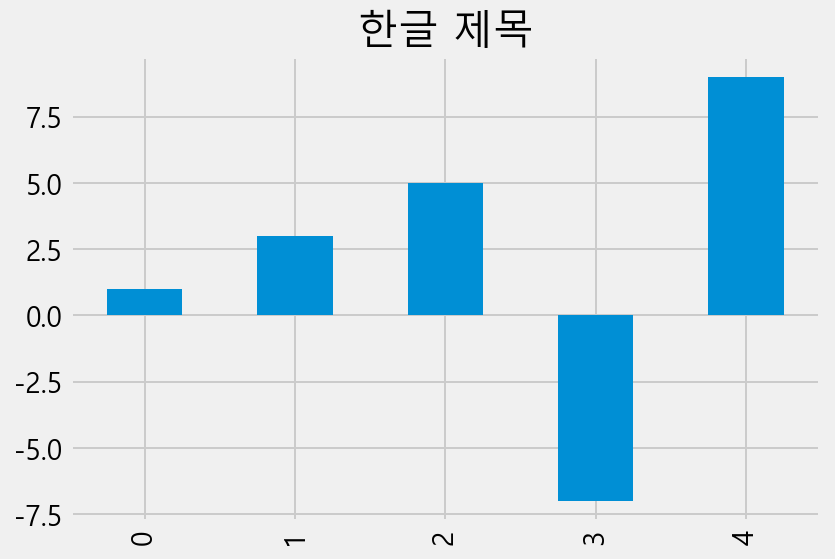

In [468]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
plt.style.use("fivethirtyeight")

pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

## 2.1 시각화 선명하게 설정하기

In [469]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 3. 확진일

**[5/25] 시계열 데이터 전처리**

In [470]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.
# object 타입 빈도수 셀 때 많이 쓴다.
df["확진일"].value_counts()

8.29.    167
8.27.    160
8.26.    157
8.18.    151
8.15.    146
        ... 
5.9.       1
4.18.      1
5.17.      1
2.7.       1
2.2.       1
Name: 확진일, Length: 247, dtype: int64

In [471]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.
df["확진일"].head(1)

0    10.24.
Name: 확진일, dtype: object

In [472]:
# 데이터 타입을 변경해서 날짜형태로 반환합니다.
# 판다스의 to_datetime 을 사용해서 날짜 타입으로 변경할 수 있습니다.
# 연도가 없기 때문에 2020년을 날짜에 추가하고 "=" 문자로 날짜를 연결해 줍니다.
# str 붙여야 한다.

df["확진일자"] = pd.to_datetime("2020-" + df["확진일"].str.replace(".", "-"))
df[["확진일", "확진일자"]].head()

,확진일,확진일자
0,10.24.,2020-10-24
1,10.24.,2020-10-24
2,10.24.,2020-10-24
3,10.24.,2020-10-24
4,10.24.,2020-10-24


In [473]:
# 월만 추출합니다.

df["월"] = df["확진일자"].dt.month
df[["확진일", "확진일자", "월"]].head()

,확진일,확진일자,월
0,10.24.,2020-10-24,10
1,10.24.,2020-10-24,10
2,10.24.,2020-10-24,10
3,10.24.,2020-10-24,10
4,10.24.,2020-10-24,10


In [474]:
# 해당 연도의 몇 번째 "주"인지 추출합니다.

df["주"] = df["확진일자"].dt.week
df[["확진일", "확진일자", "월", "주"]].head()

,확진일,확진일자,월,주
0,10.24.,2020-10-24,10,43
1,10.24.,2020-10-24,10,43
2,10.24.,2020-10-24,10,43
3,10.24.,2020-10-24,10,43
4,10.24.,2020-10-24,10,43


## 3.1 선그래프 그리기

**[6/25] 확진일자별 빈도 선그래프 그리기 -Pnadas plot에 스타일 적용하기**

In [475]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주
0,5807,25828,10.24.,타시도,-,기타 확진자 접촉,NaN,2020-10-24,10,43
1,5806,25821,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43
2,5805,25806,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43
3,5804,25790,10.24.,서대문구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43
4,5803,25799,10.24.,양천구,-,감염경로 조사중,NaN,2020-10-24,10,43


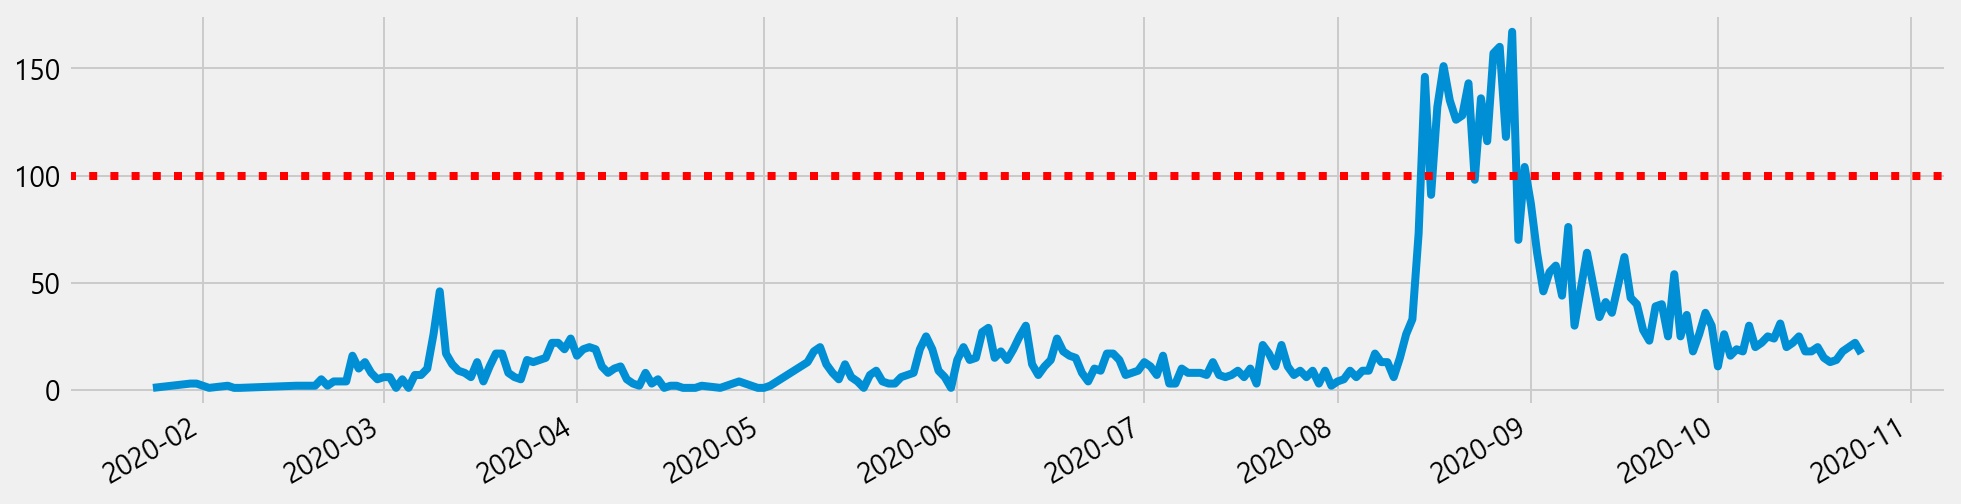

In [476]:
# 확진일자로 선그래프를 그립니다.

df["확진일자"].value_counts().plot(figsize=(15,4))
plt.axhline(100, color="red", linestyle=":")

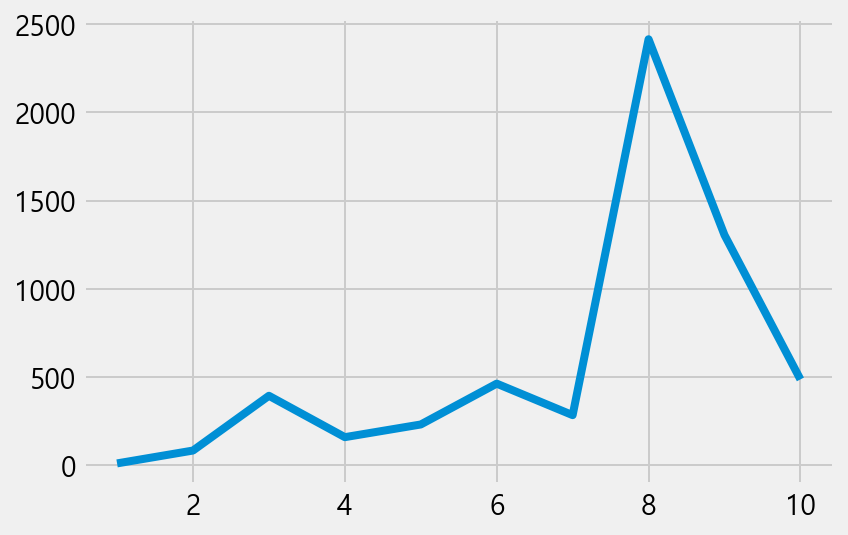

In [477]:
# 월로 선그래프를 그립니다.

df["월"].value_counts().sort_index().plot()

## 3.2 선그래프에 값 표시하기

**[7/25] 엑셀에서는 쉽게 되는 그래프에 값 표시하기 pandas plot 에서는 어떻게 해야 될까?**

In [478]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.

df["월일"] = df["확진일자"].astype(str).map(lambda x: x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[3]

1

Text(2, 3, '3')

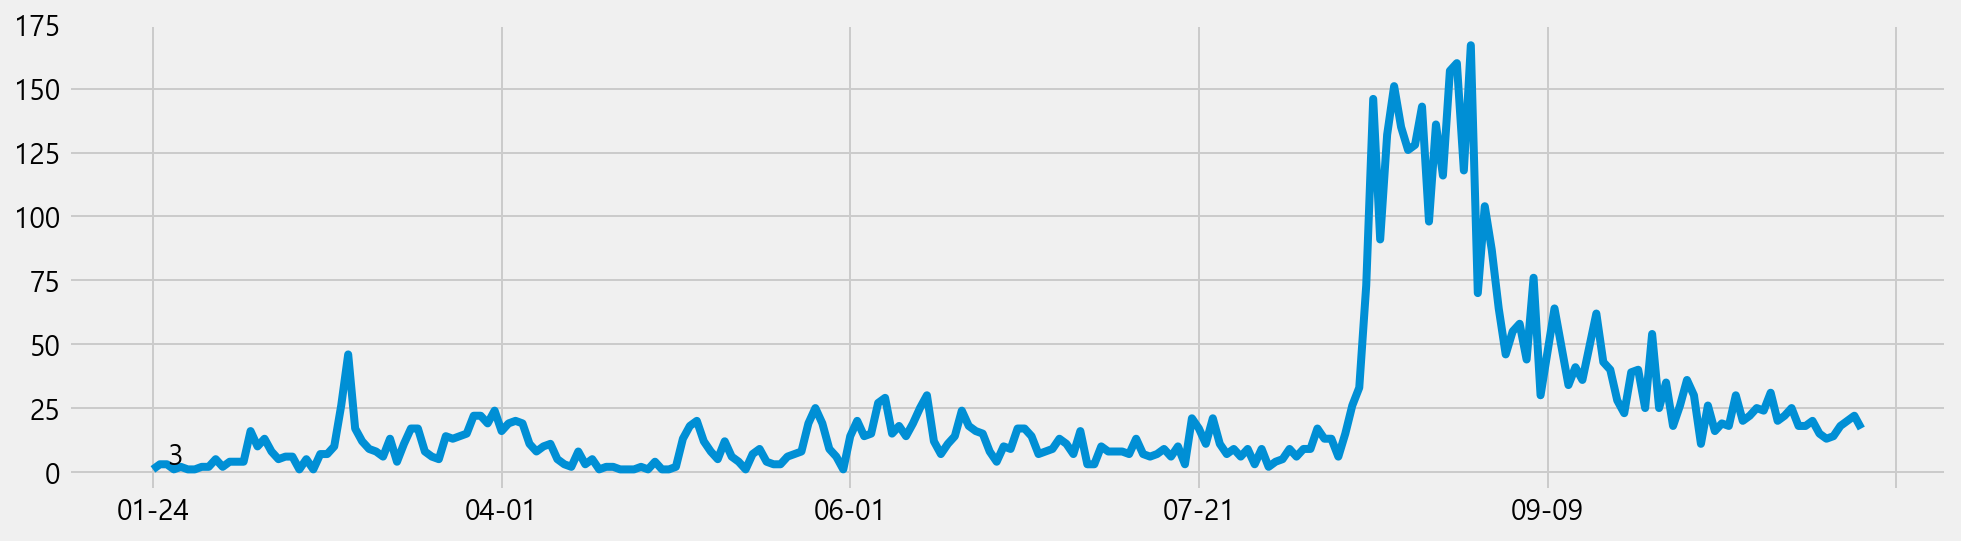

In [479]:
# 그래프 위에 나오는 문구를 빼고 싶으면 변수에 할당해주면 된다.
g = day_count.plot(figsize=(15,4))
g.text(x=2, y=3, s=3)

In [480]:
for i in range(len(day_count)):
    print(i, day_count.iloc[i])

0 1
1 3
2 3
3 1
4 2
5 1
6 1
7 2
8 2
9 5
10 2
11 4
12 4
13 4
14 16
15 10
16 13
17 8
18 5
19 6
20 6
21 1
22 5
23 1
24 7
25 7
26 10
27 26
28 46
29 17
30 12
31 9
32 8
33 6
34 13
35 4
36 11
37 17
38 17
39 8
40 6
41 5
42 14
43 13
44 14
45 15
46 22
47 22
48 19
49 24
50 16
51 19
52 20
53 19
54 11
55 8
56 10
57 11
58 5
59 3
60 2
61 8
62 3
63 5
64 1
65 2
66 2
67 1
68 1
69 1
70 2
71 1
72 4
73 1
74 1
75 2
76 13
77 18
78 20
79 12
80 8
81 5
82 12
83 6
84 4
85 1
86 7
87 9
88 4
89 3
90 3
91 6
92 7
93 8
94 19
95 25
96 19
97 9
98 6
99 1
100 14
101 20
102 14
103 15
104 27
105 29
106 15
107 18
108 14
109 19
110 25
111 30
112 12
113 7
114 11
115 14
116 24
117 18
118 16
119 15
120 8
121 4
122 10
123 9
124 17
125 17
126 14
127 7
128 8
129 9
130 13
131 11
132 7
133 16
134 3
135 3
136 10
137 8
138 8
139 8
140 7
141 13
142 7
143 6
144 7
145 9
146 6
147 10
148 3
149 21
150 17
151 11
152 21
153 11
154 7
155 9
156 6
157 9
158 3
159 9
160 2
161 4
162 5
163 9
164 6
165 9
166 9
167 17
168 13
169 13
170 6
171 15
172 2

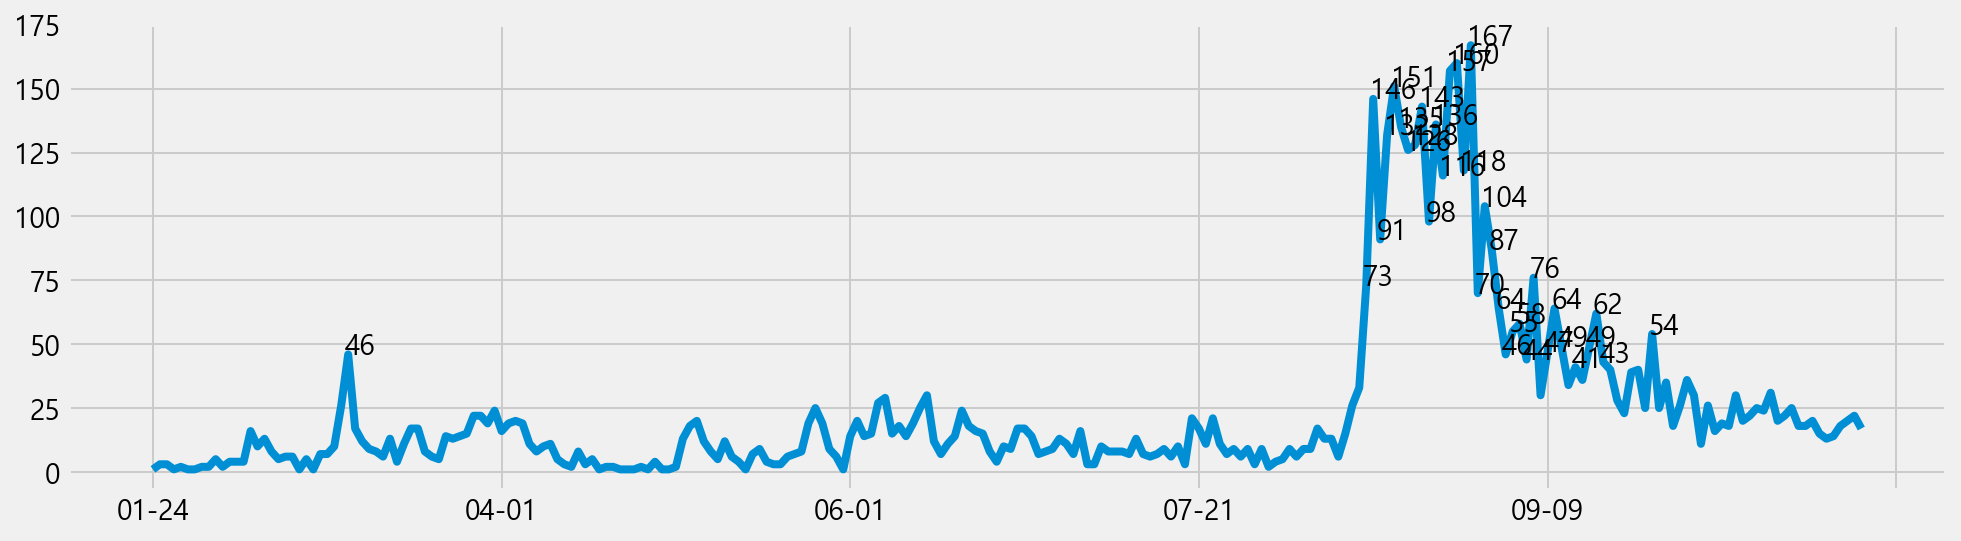

In [481]:
g = day_count.plot(figsize=(15,4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 40:
        g.text(x=i-0.5, y=case_count, s=case_count)

## 3.3 확진자가 가장 많이 나온 날

**[8/25] 일부 데이터만 잘라서 시각화 하고 싶을 때 슬라이싱 기능 사용하기**

In [482]:
# describe 를 통해 일자별 확진자수를 describe 를 통해 요약해 봅니다.

day_count.describe()

count    246.000000
mean      23.605691
std       32.622814
min        1.000000
25%        6.000000
50%       13.000000
75%       24.000000
max      167.000000
Name: 월일, dtype: float64

In [483]:
# 확진자가 가장 많았던 날을 찾습니다.
day_count[day_count == day_count.max()]

08-29    167
Name: 월일, dtype: int64

In [484]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.
df[df["월일"] == "08-29"]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
1894,3913,20100,8.29.,관악구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
1929,3878,19716,8.29.,동작구,-,성북구 사랑제일교회 관련,퇴원,2020-08-29,8,35,08-29
1956,3851,19830,8.29.,구로구,-,영등포구 권능교회,퇴원,2020-08-29,8,35,08-29
1957,3850,19849,8.29.,노원구,-,노원구 빛가온교회 관련,퇴원,2020-08-29,8,35,08-29
1958,3849,19898,8.29.,금천구,-,타시도 확진자 접촉,퇴원,2020-08-29,8,35,08-29
...,...,...,...,...,...,...,...,...,...,...,...
2144,3663,19451,8.29.,강남구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2145,3662,19462,8.29.,동대문구,-,동대문구 sk탁구클럽,퇴원,2020-08-29,8,35,08-29
2146,3661,19416,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29
2147,3660,19434,8.29.,강북구,-,기타 확진자 접촉,퇴원,2020-08-29,8,35,08-29


## 3.4 막대그래프 그리기

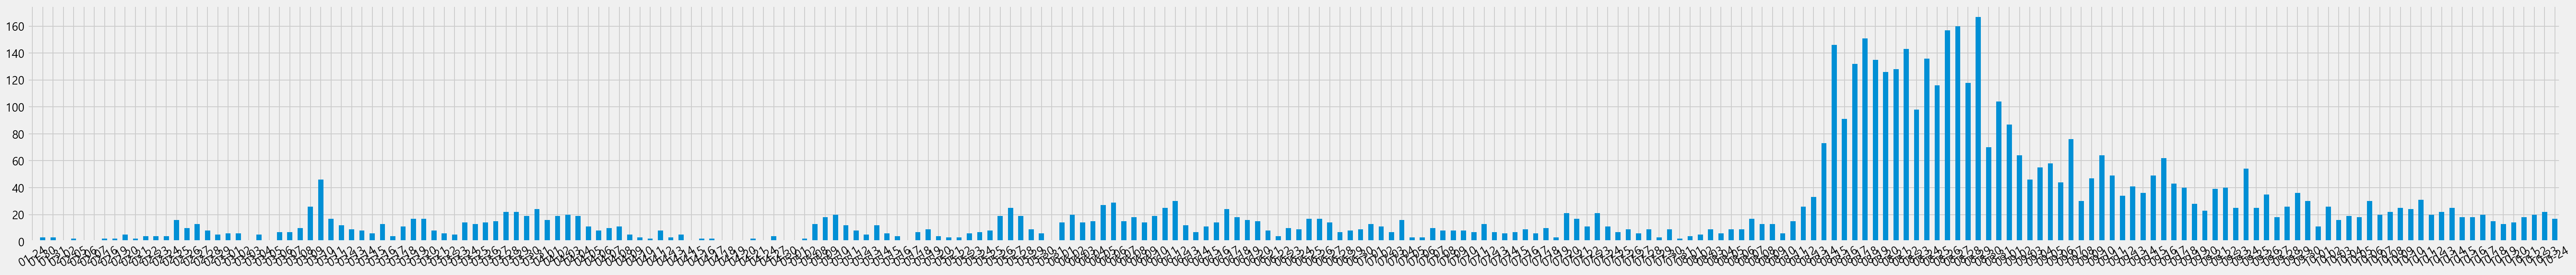

In [485]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(50,5), rot=30)

## 3.5 최근 데이터만 슬라이싱으로 나눠 그리기

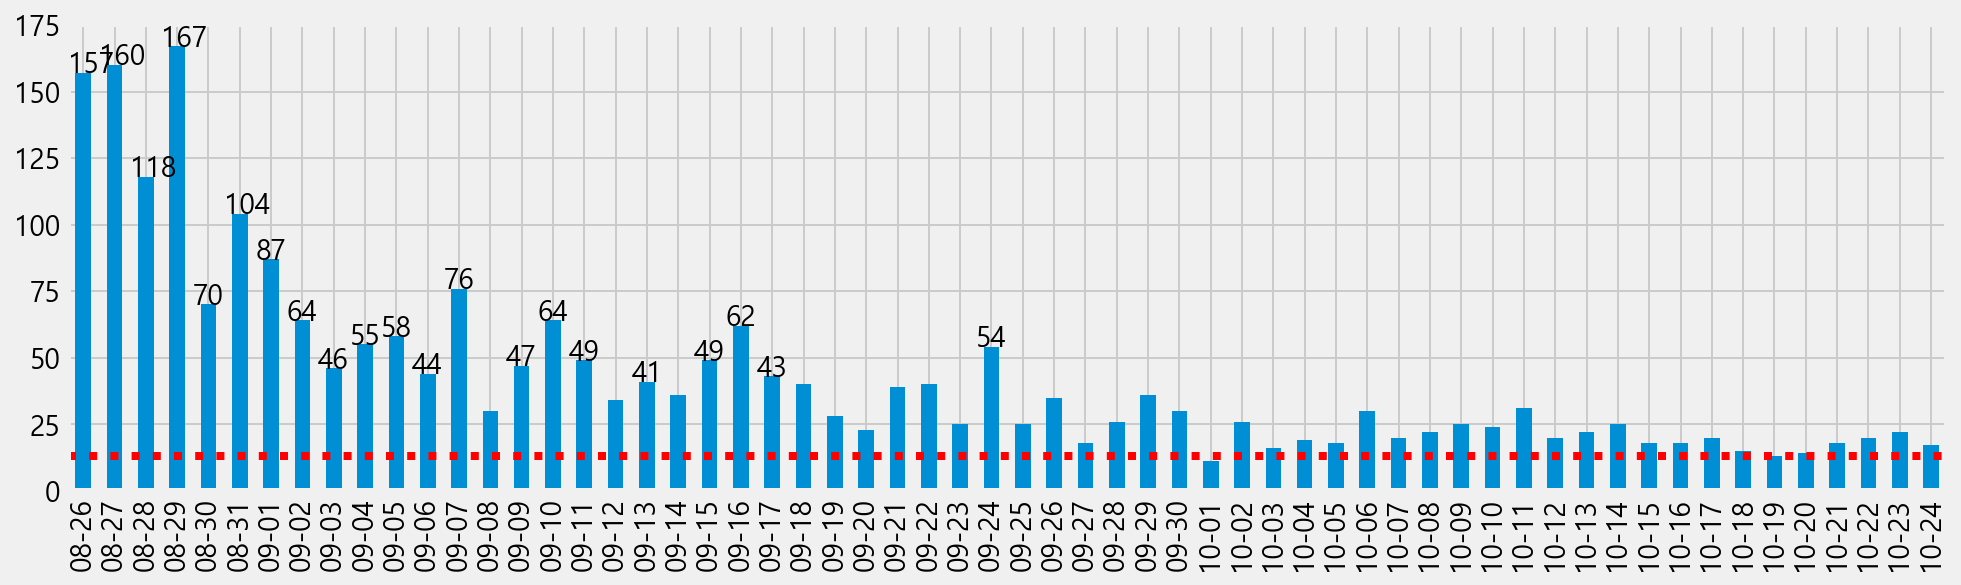

In [486]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

gg = day_count[-60:].plot.bar(figsize=(15,4))
gg.axhline(day_count.median(), linestyle=":", color="red")

for i in range(60):
    case_count = day_count[-60:].iloc[i]
    if case_count > 40:
        gg.text(x=i-0.5, y=case_count, s=case_count)

## 3.6 월별 확진자 수 그리기

**[9/25] 월 단위로 확진자 추이는 어떻게 될까?**

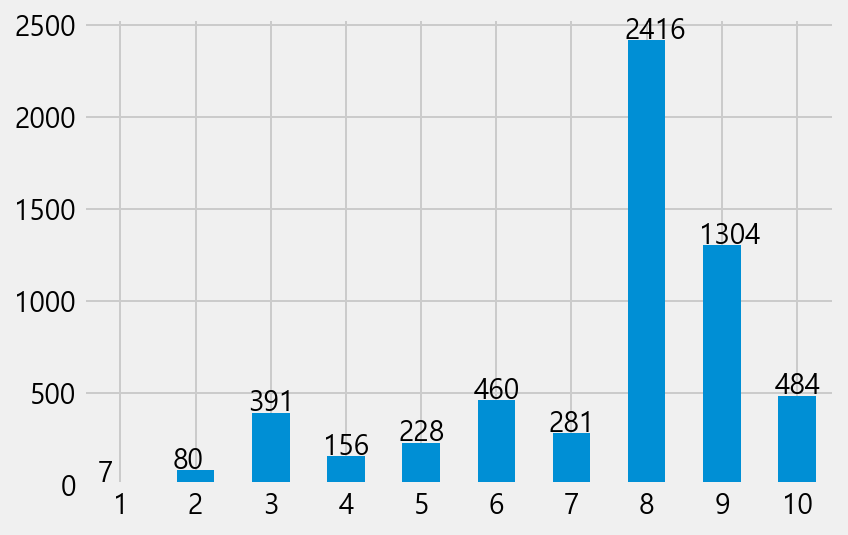

In [487]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
ggg = month_case.plot.bar(rot=0)
for i in range(len(month_case)):
    ggg.text(x=i-0.3, y=month_case.iloc[i]+10, s=month_case.iloc[i])

In [488]:
month_case.iloc[0]

7

## 3.7 주단위 확진자수 그리기

**[10/25] 여러 변수의 빈도수를 구하려면?**

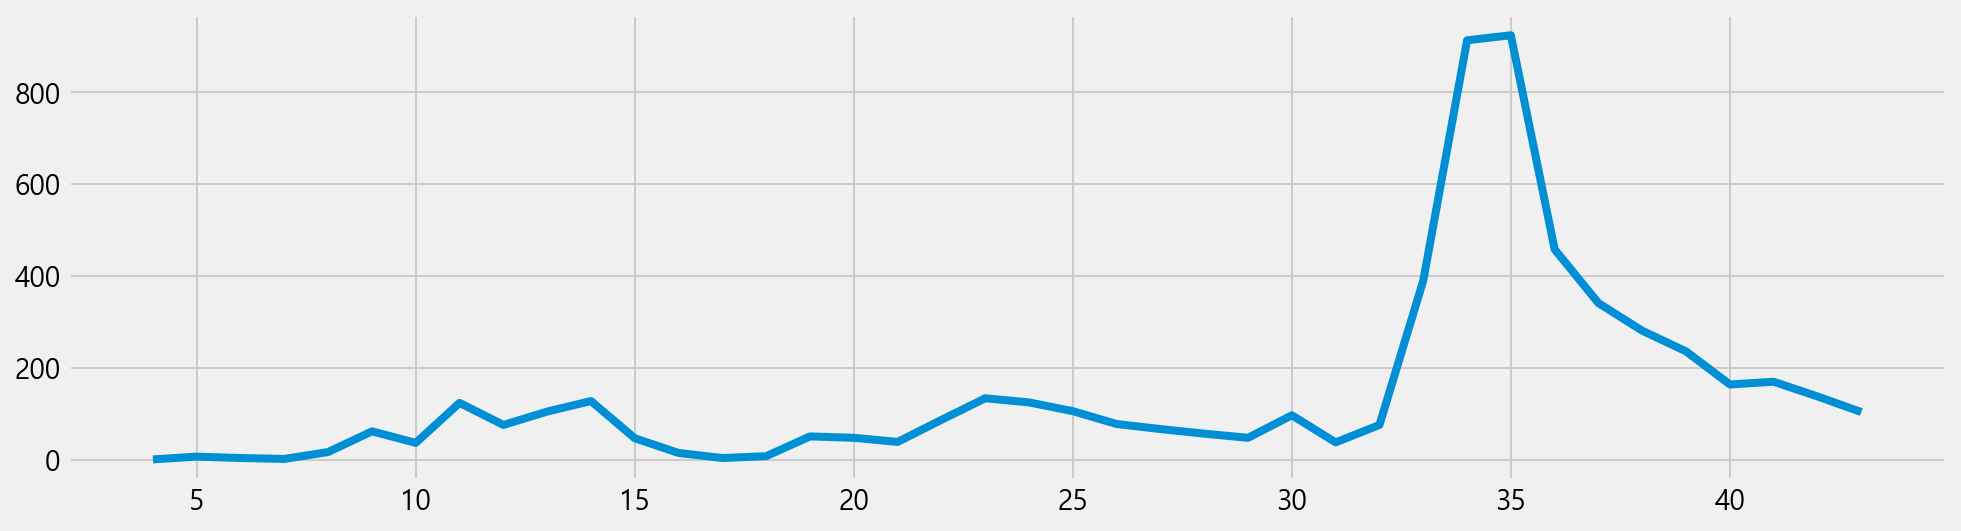

In [489]:
# 주별로 빈도수를 구합니다.
weekly_case = df["주"].value_counts().sort_index()
weekly_case.plot(figsize=(15,4))

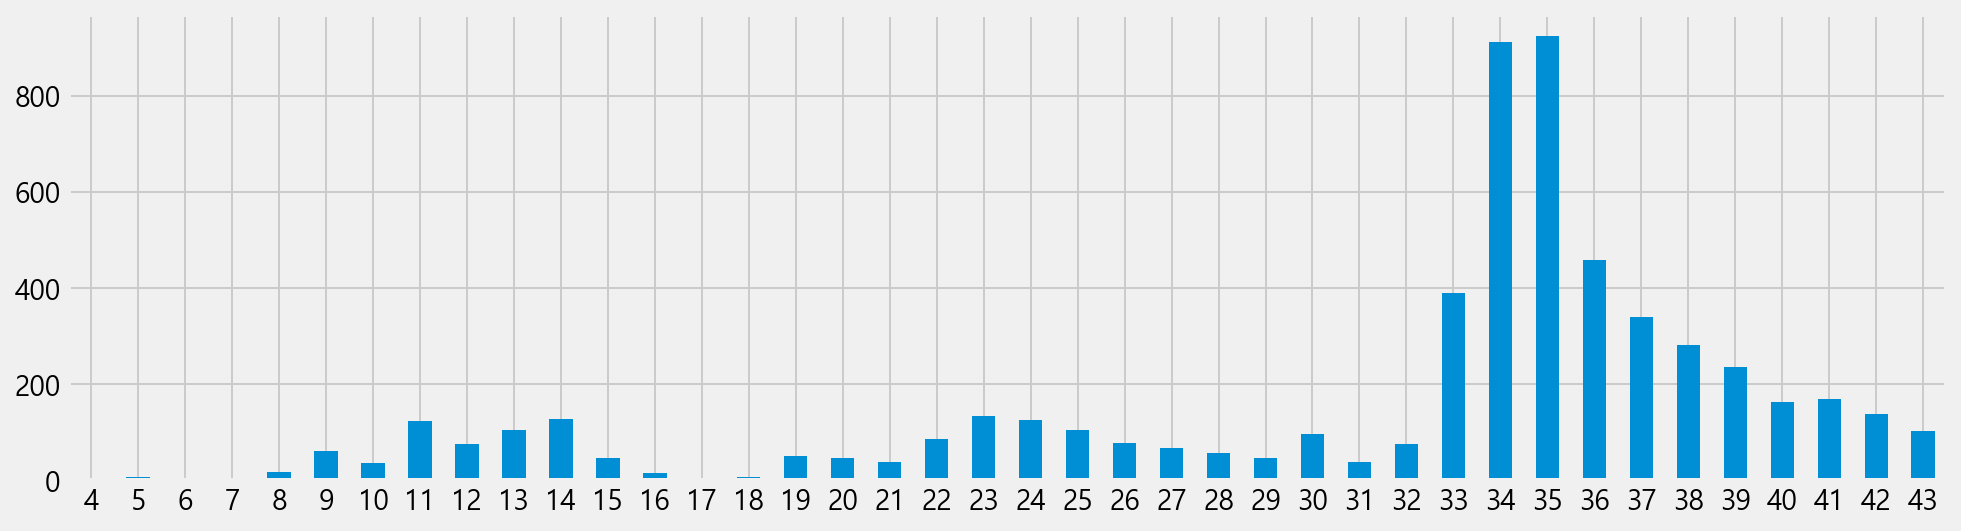

In [490]:
# 주별로 빈도수 막대그래프로 그리기
weekly_case.plot.bar(figsize=(15,4), rot=0)

## 3.8 월-주 함께 그리기

In [491]:
# groupby 를 통해 "월", "주" 로 그룹화 하여 빈도수를 개선합니다.

month_weekly_case = df.groupby(["월", "주"])["연번"].count()
month_weekly_case.head()

월  주
1  4    1
   5    6
2  5    1
   6    4
   7    2
Name: 연번, dtype: int64

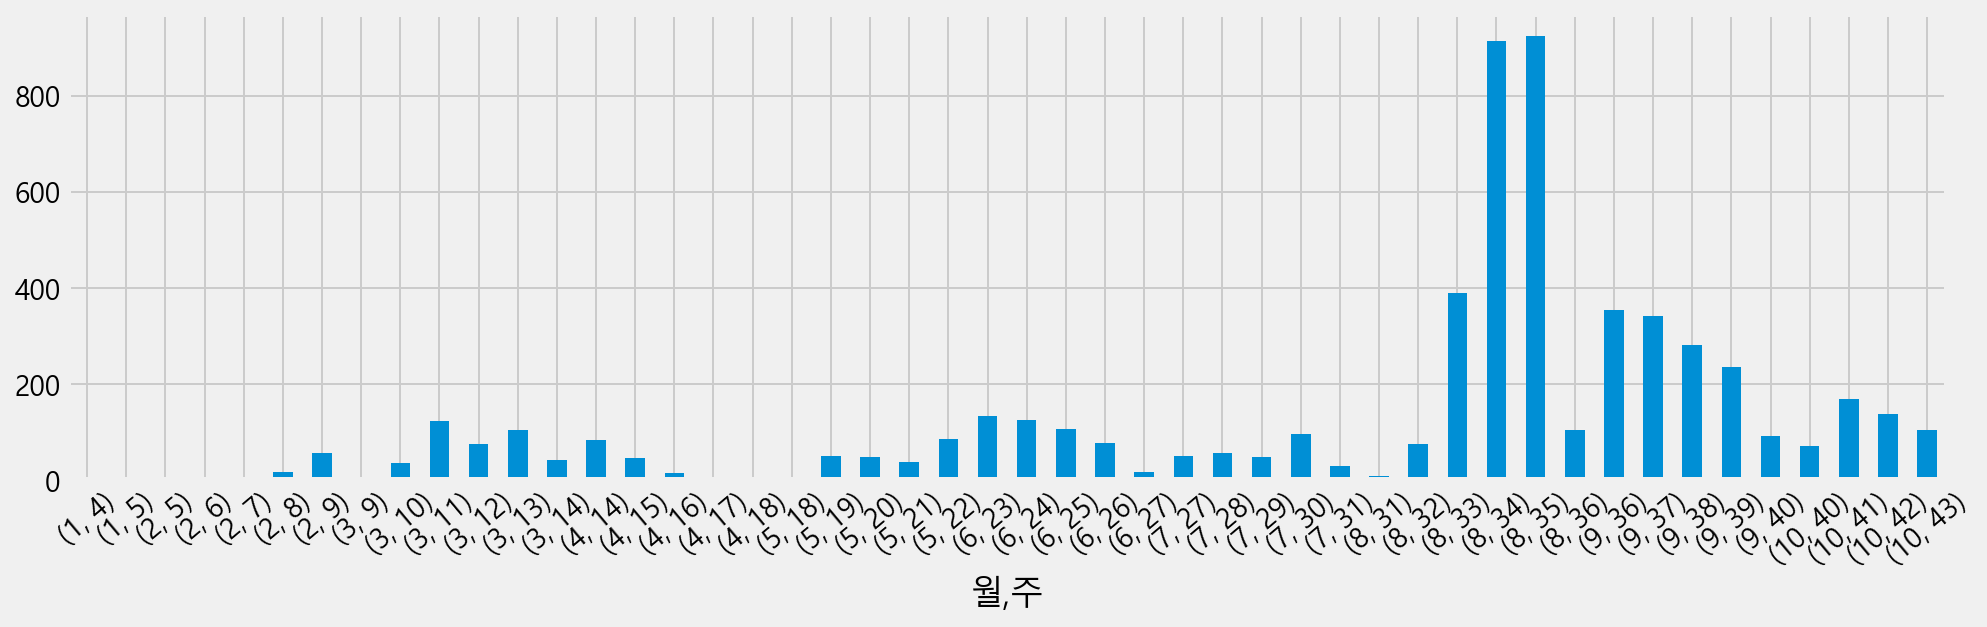

In [492]:
# 월-주 를 함께 그래프에 표현하기

month_weekly_case.plot.bar(figsize=(15,4), rot=40)

# 4. 모든 날짜를 행에 만들어 주기
* 확진자가 없는 날의 데이터도 만들어 줍니다.

**[11/25] 확진자가 없는 날은 데이터프레임에 어떻게 만들까?**

In [493]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일
5802,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31
5803,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5804,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30
5805,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30
5806,1,2,1.24.,강서구,중국 우한시,해외 접촉,퇴원,2020-01-24,1,4,01-24


In [494]:
# 첫 확진일 부터 마지막 확진일 까지 가져옵니다.
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.
# %timeit 속도측정

first_day = df.iloc[-1, 7]
last_day = df.iloc[0, 7]
last_day

Timestamp('2020-10-24 00:00:00')

In [495]:
# pd.data_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의
# DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.

days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-10-15', '2020-10-16', '2020-10-17', '2020-10-18',
               '2020-10-19', '2020-10-20', '2020-10-21', '2020-10-22',
               '2020-10-23', '2020-10-24'],
              dtype='datetime64[ns]', length=275, freq='D')

In [496]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.
# days.to_frame()
df_days = pd.DataFrame({"확진일자": days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [497]:
# 확진일자별로 빈도수 구하기

daily_case = df["확진일자"].value_counts().sort_index()
daily_case.head()

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
Name: 확진일자, dtype: int64

In [498]:
# 확진일자별로 빈도수 구한 내용을 데이터프레임으로 변환하기
# value_counts 결과의 컬럼명을 "확진수"로 바꾸기
#df_daily_case = pd.DataFrame({"확진수" : daily_case})
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case.head()

,확진수
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2


## 4.1 merge를 통해 전체 확진일자 만들기

In [499]:
# 확진자가 없는 날도 일자에 표현이 되도록 전체 일자와 확진 데이터를 merge 로 합쳐줍니다.
#5463
all_day = df_days.merge(df_daily_case, left_on="확진일자", right_on=df_daily_case.index, how="left")
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


# 5. 누적 확진자 수 구하기

**[12/25] 그래프에서 누적확진자수가 너무 커서 일별 확진자 수를 알아보기 어렵다면?**

In [500]:
# 확진수를 fillna 를 통해 결측치를 0으로 채워주고 누적해서 더해줍니다.

all_day["누적확진"] = all_day["확진수"].fillna(0).cumsum()
all_day = all_day.fillna(0)
all_day = all_day.astype({'확진수': int, '누적확진': int})
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1,1
1,2020-01-25,0,1
2,2020-01-26,0,1
3,2020-01-27,0,1
4,2020-01-28,0,1
...,...,...,...
270,2020-10-20,14,5730
271,2020-10-21,18,5748
272,2020-10-22,20,5768
273,2020-10-23,22,5790


In [501]:
# 연도를 제외하고 월-일로 "일자" 컬럼 만들기

all_day["일자"] = all_day["확진일자"].astype(str).map(lambda x : x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1,1,01-24
1,2020-01-25,0,1,01-25
2,2020-01-26,0,1,01-26
3,2020-01-27,0,1,01-27
4,2020-01-28,0,1,01-28


In [502]:
# "확진수", "누적확진" 컬럼을 갖는 데이터프레임을 만듭니다.

cum_day = all_day[["일자", "확진수", "누적확진"]]
cum_day = cum_day.set_index("일자")
cum_day.head()

,확진수,누적확진
일자,,
01-24,1,1
01-25,0,1
01-26,0,1
01-27,0,1
01-28,0,1


## 5.1 데이터프레임으로 그리기

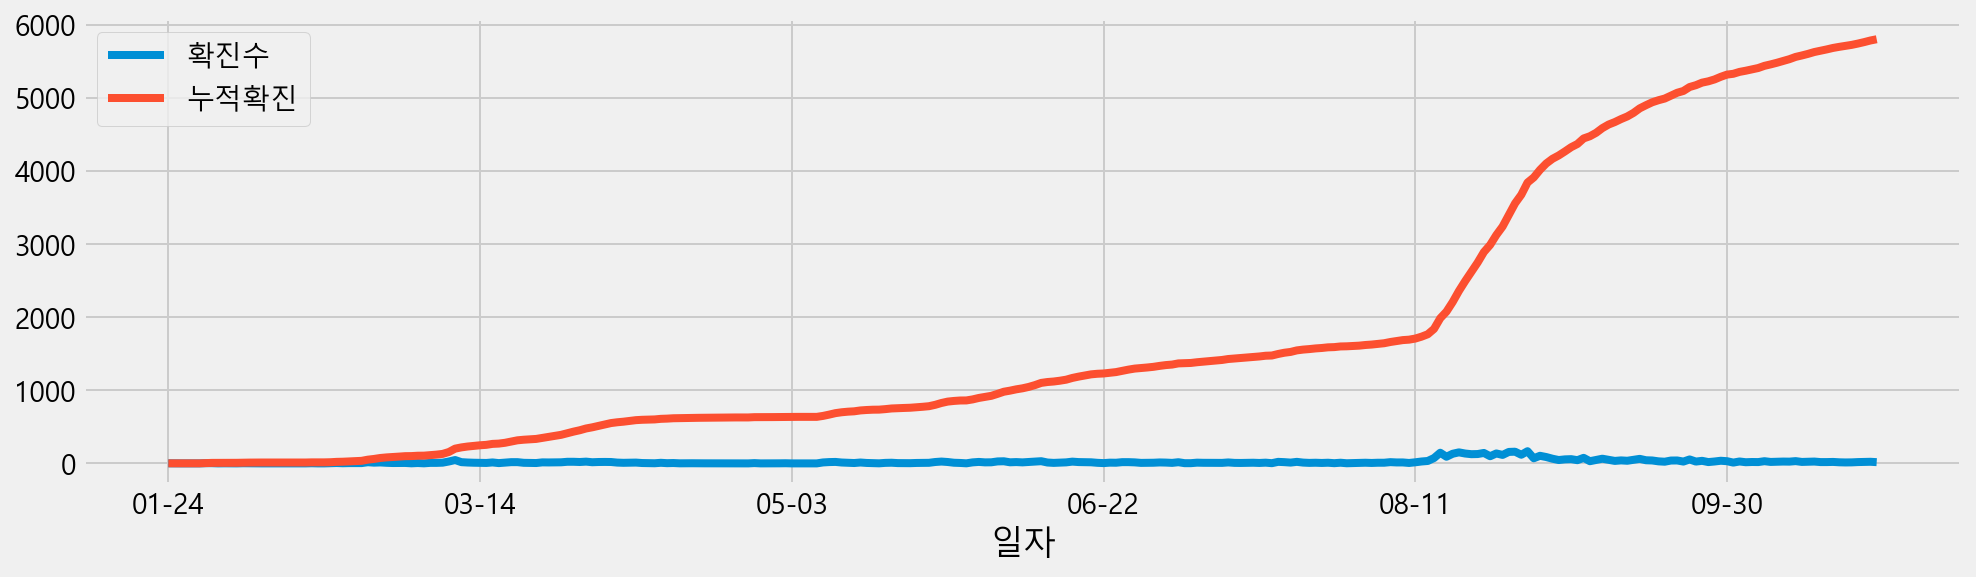

In [503]:
# 데이터프레임으로 확진수와 누적확진을 선그래프로 그립니다.

cum_day.plot(figsize=(15,4))

## 5.2 시리즈로 그리기

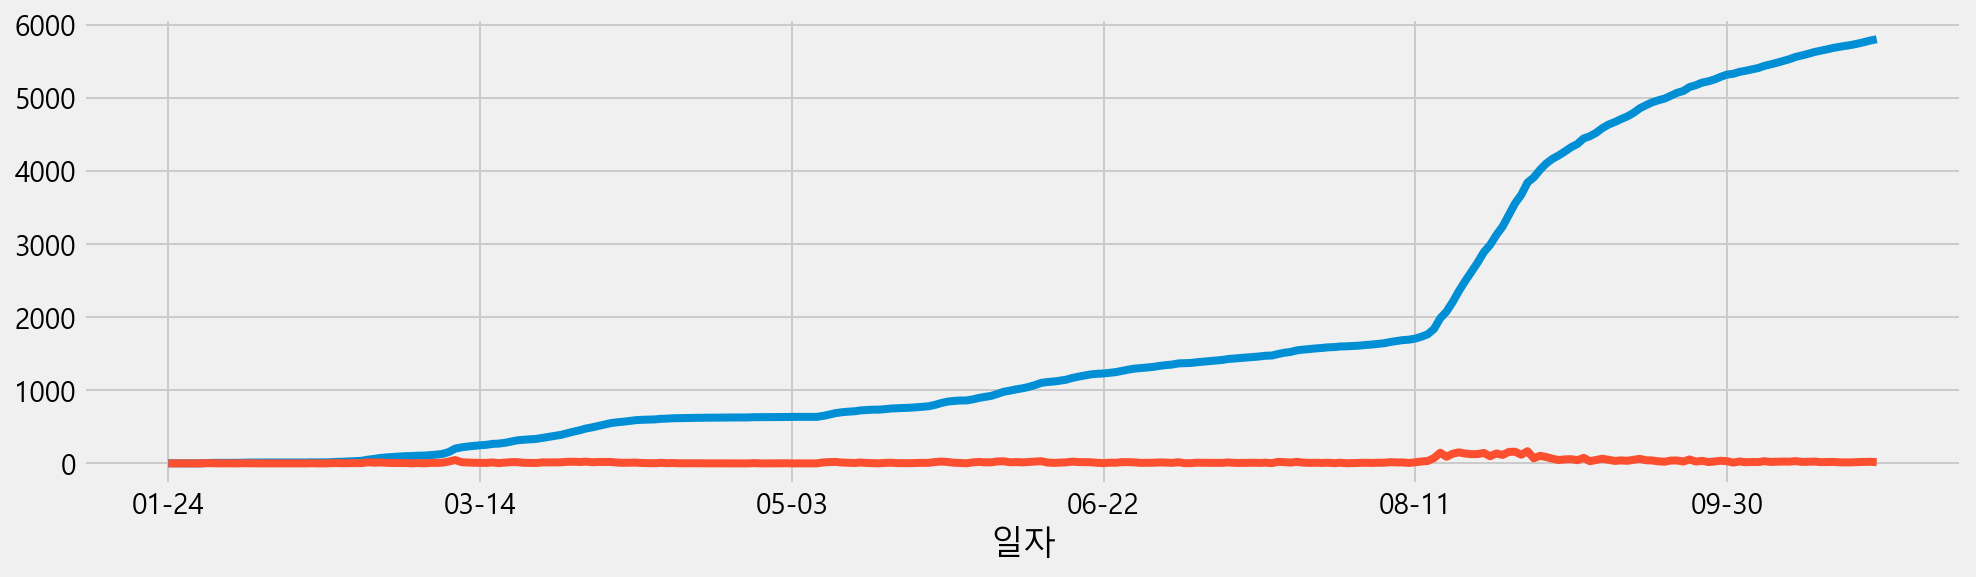

In [504]:
# 시리즈로 2개의 그래프 그리기

cum_day["누적확진"].plot(figsize=(15,4))
cum_day["확진수"].plot()

## 5.3 확진수만 따로 그리기

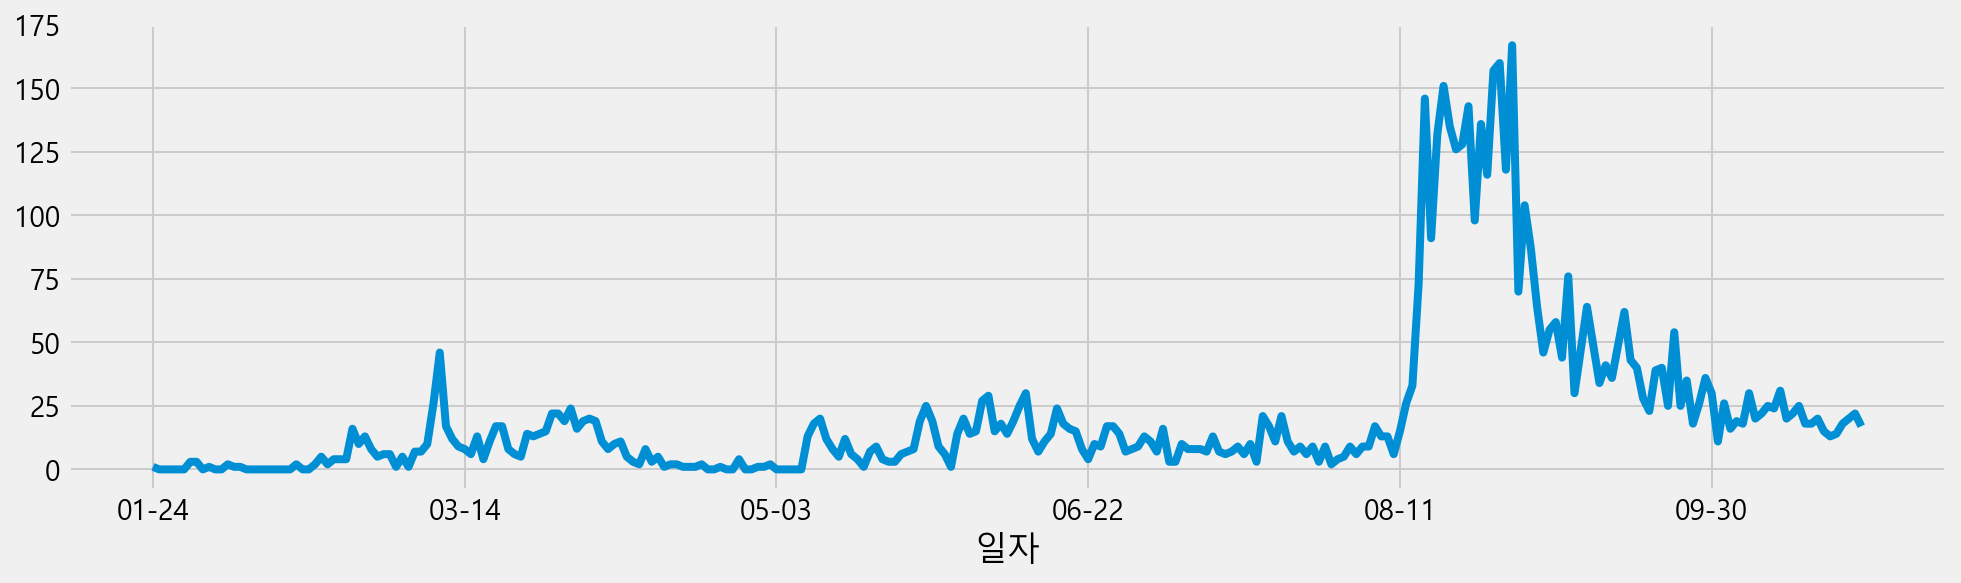

In [505]:
# 누적확진수와 확진수와 차이가 크면 제대로 보이지 않기 때문에 확진수만 그립니다.
cum_day["확진수"].plot(figsize=(15,4))

## 5.4 누적확진만 따로 그리기

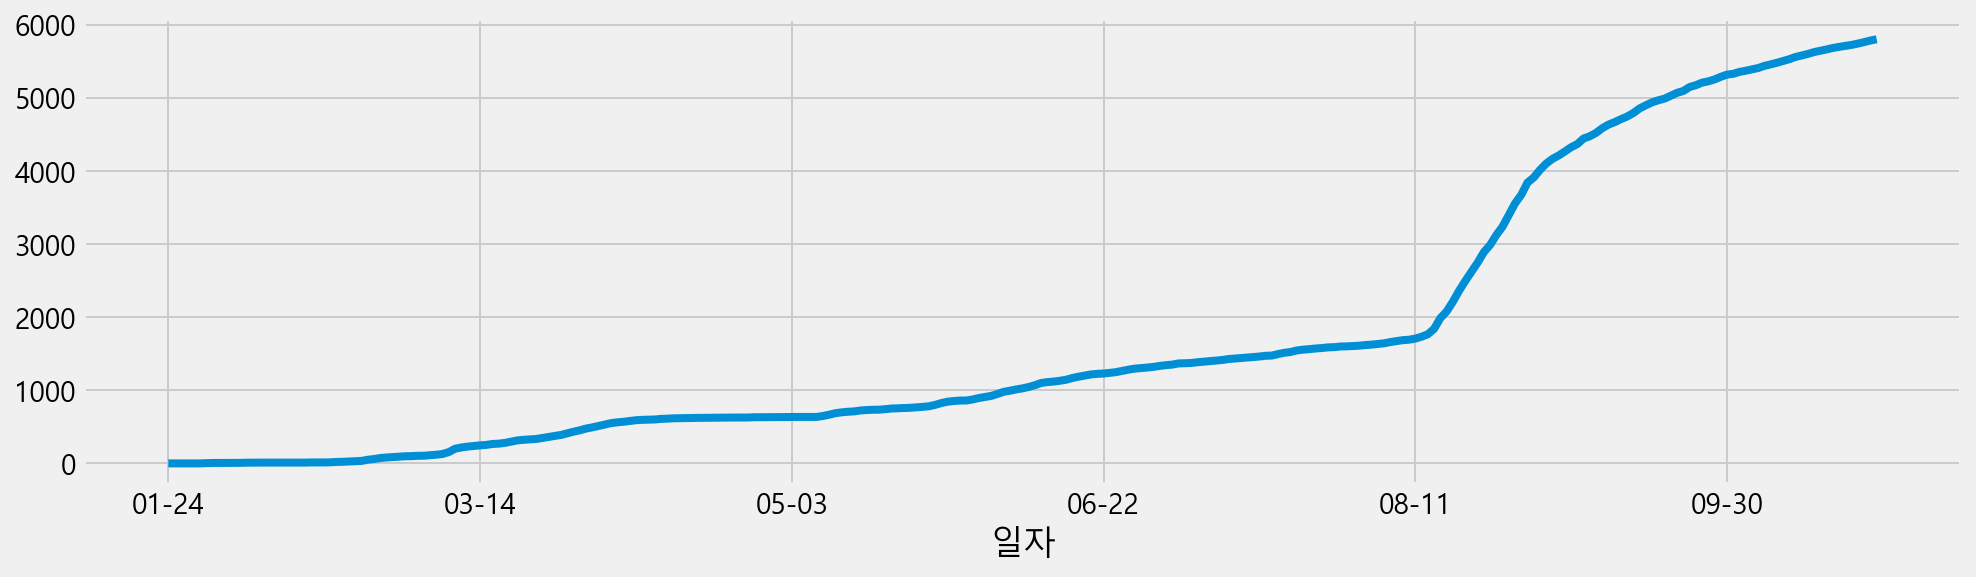

In [506]:
# 누적확진만 따로 그립니다.
cum_day["누적확진"].plot(figsize=(15,4))

## 5.5 로그스케일
* 차이가 너무 커서 그래프가 자세히 보이지 않을 때 로그스케일로 표현하면 차이가 큰 값의 스케일을 조정해주게 됩니다.

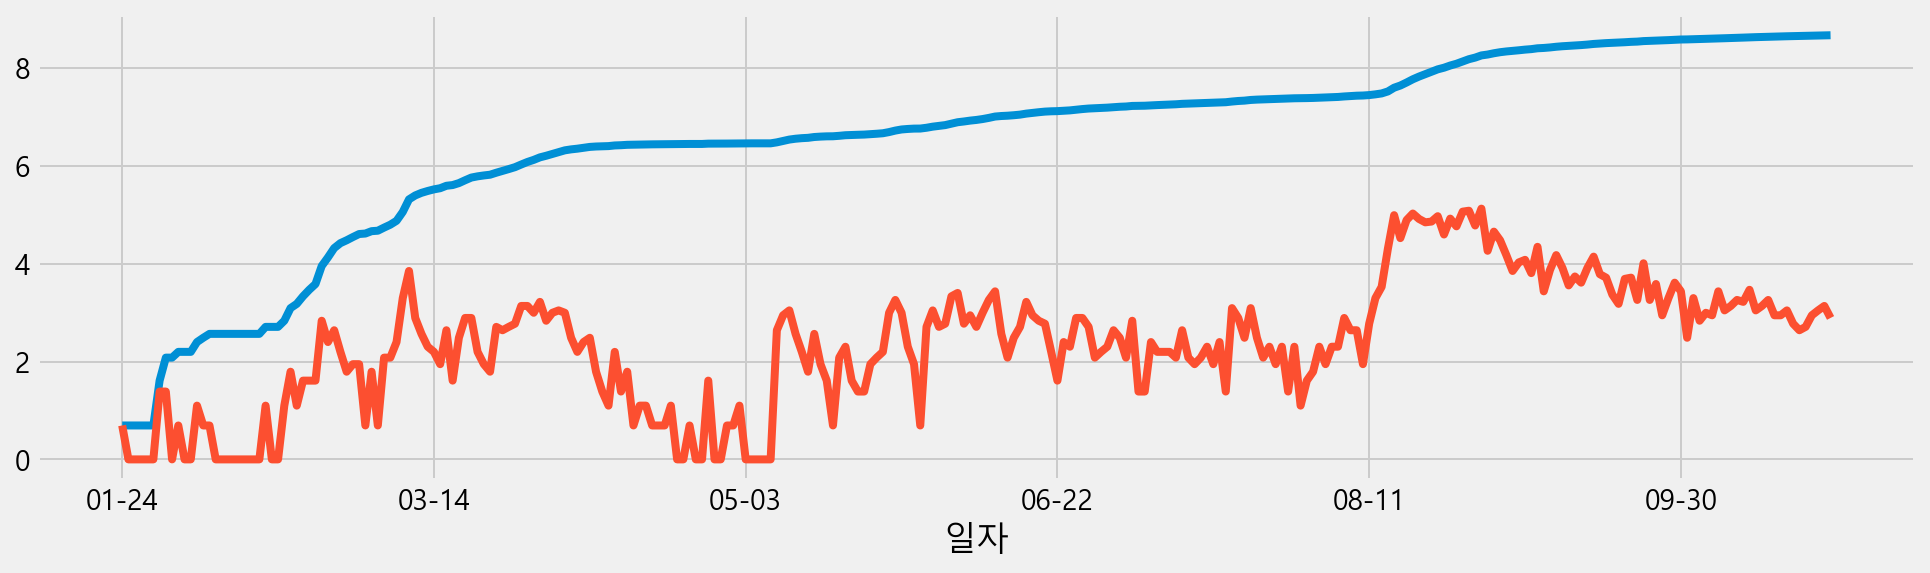

In [507]:
np.log(cum_day["누적확진"] + 1).plot(figsize=(15,4))
np.log(cum_day["확진수"] + 1).plot()

# 6. 확진월과 요일 구하기

**[13/25] 월별, 요일별 확진자수는 어떻게 달라졌을까?**

In [508]:
# 월 가져오기 dt.month
# 0 = 월요일
all_day["확진월"] = all_day["확진일자"].dt.month
all_day["확진요일"] = all_day["확진일자"].dt.dayofweek
all_day.head()

,확진일자,확진수,누적확진,일자,확진월,확진요일
0,2020-01-24,1,1,01-24,1,4
1,2020-01-25,0,1,01-25,1,5
2,2020-01-26,0,1,01-26,1,6
3,2020-01-27,0,1,01-27,1,0
4,2020-01-28,0,1,01-28,1,1


## 6.1 요일별 확진 수

In [509]:
# 월별, 요일별 확진수를 groupby 로 구하기
all_day_week = all_day.groupby(["확진월", "확진요일"])["확진수"].sum()
# type(all_day_week) -- series
# print(all_day_week.index)
all_day_week = all_day_week.unstack().astype(int)
all_day_week

확진요일,0,1,2,3,4,5,6
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [510]:
# 숫자로 표현된 요일을 문자로 바꿔주기 위해 split 을 통해 문자를 리스트로 변경합니다.
# dayofweek
dayofweek = "월 화 수 목 금 토 일"
dayofweek = dayofweek.split()
dayofweek

['월', '화', '수', '목', '금', '토', '일']

In [511]:
# 컬럼의 이름을 한글요일 명으로 변경해 줍니다.
all_day_week.columns = dayofweek
all_day_week

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


In [512]:
# style.background_gradiant 로 색상을 표현합니다.
# cmap="Greens_r" 작은 숫자를 진하게 해준다.
# maplotlib 에서 cmap 검색하면 숫자 알 수 있다.

all_day_week.style.background_gradient(cmap="Greens")

,월,화,수,목,금,토,일
확진월,,,,,,,
1,0,0,0,3,4,0,0
2,4,16,14,19,11,9,7
3,69,89,46,44,48,45,50
4,16,17,28,27,26,22,20
5,27,36,34,34,32,36,29
6,55,67,66,75,90,70,37
7,37,42,42,58,34,40,28
8,387,288,327,328,336,473,277
9,177,242,228,207,169,155,126


# 7. 거주지별 확진자

**[14/25] 거주지(구)별 확진자는 어떻게 될까?**

In [513]:
# 거주지(구별) 확진자의 빈도수를 구하고 시각화 합니다.
# 범주형 데이터의 수를 셀 때 많이 쓴다.
gu_count = df["거주지"].value_counts()
gu_count.head()

관악구    456
송파구    367
성북구    345
타시도    336
노원구    325
Name: 거주지, dtype: int64

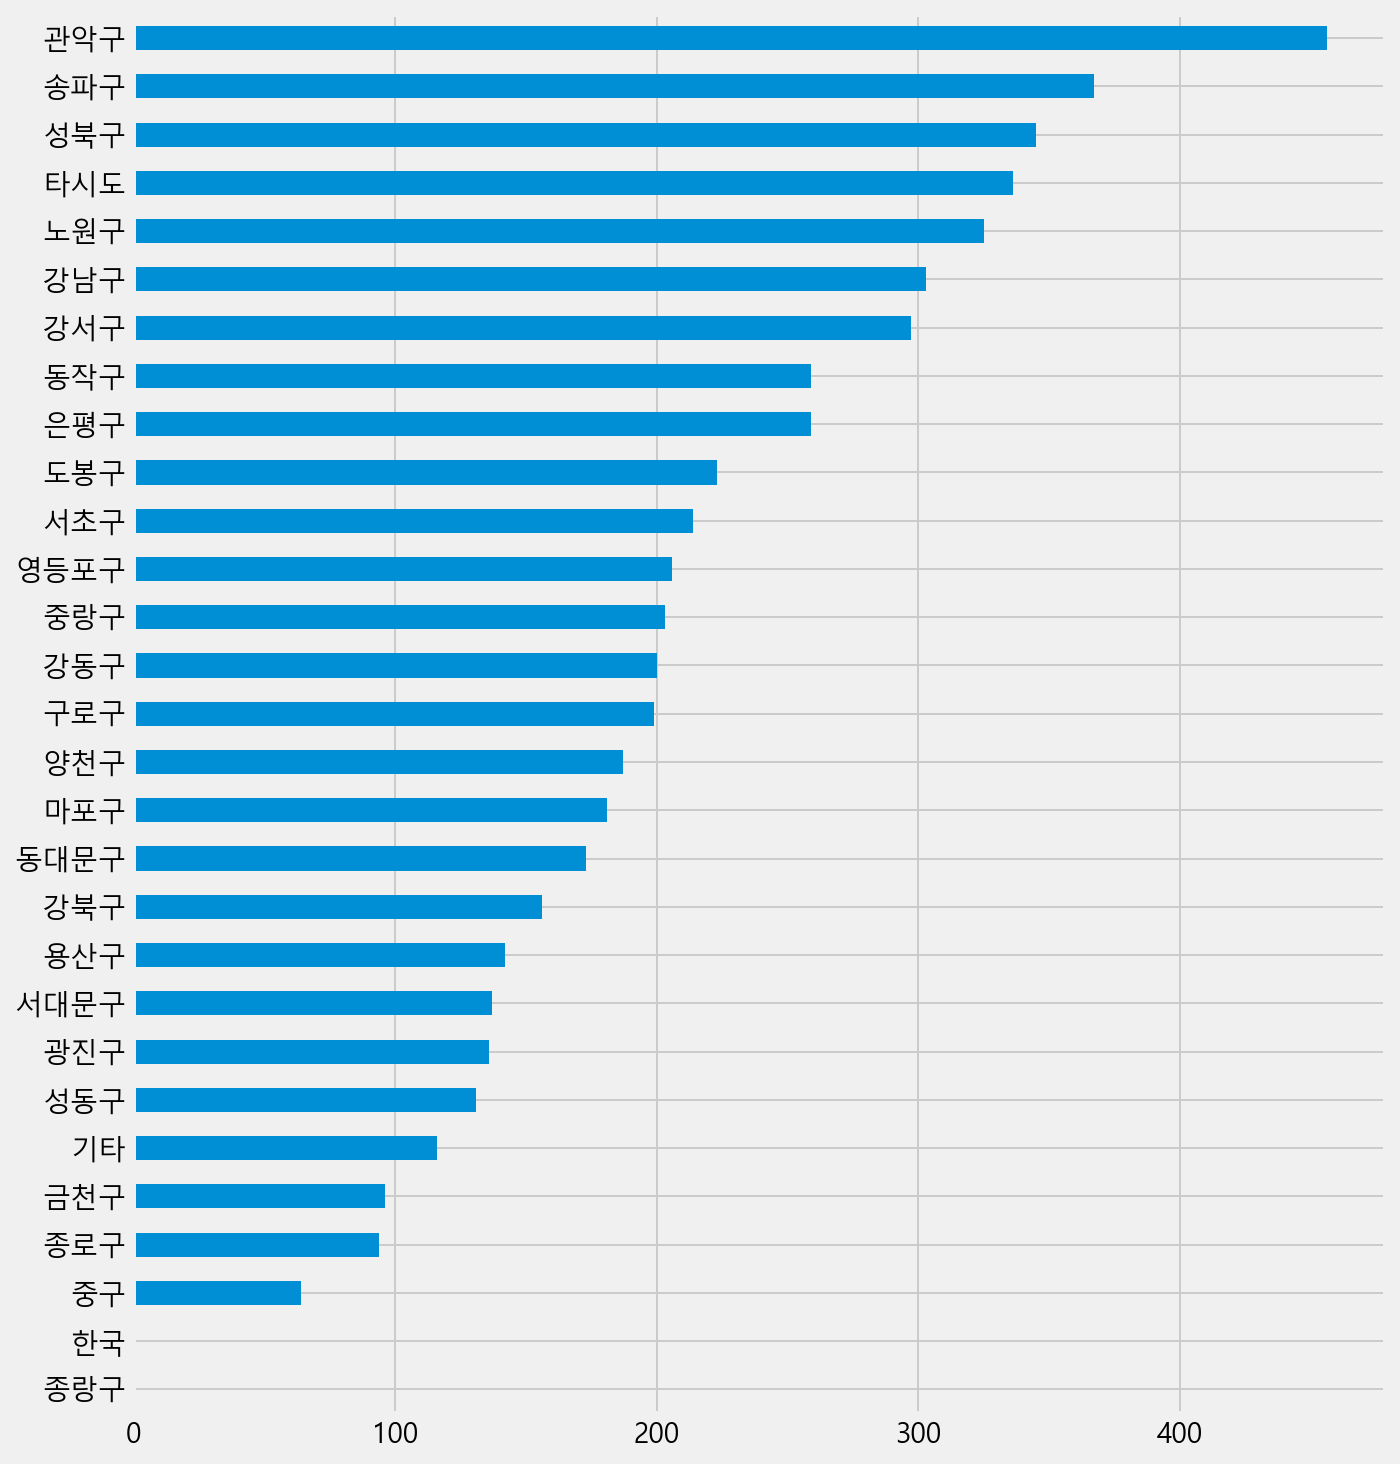

In [514]:
# 구별 확진자의 수를 시각화 합니다.
# gu_count.plot(kind="bar")
# barh 자리 바꾸기
# sort_values() 많은 것부터로 바꾸기
gu_count.sort_values().plot.barh(figsize=(10,12))

In [515]:
# 틀림!!
# 서울에서 확진판정을 받은 데이터이기 때문에 거주지가 서울이 아닐 수도 있습니다.
# 거주지 별로 서울시에 해당 되는 데이터만 따로 가져옵니다.
#gu = gu_count[[0:2, 4:22, 24:26,28]].index
#gu

In [516]:
# 거주지가 서울이 아닌 지역을 따로 추출합니다.

#set(gu_count.index) - set(gu)

In [517]:
#gu_count = gu_count.reset_index()
#not_gu_count = gu_count.loc[[23, 27],:]
#not_gu_count

In [518]:
# 구를 전처리 하기 쉽게 컬럼으로 변환하기 위해 reset_index 로 변환합니다.
# 인덱스에 있던 값이 새 컬럼으로 온다.
#df_gu = gu_count.reset_index()
#df_gu.columns = ["구", "확진수"]
#df_gu.head()

In [519]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다.
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
#df_gu[df_gu["구"].isin(gu_count)] ##-- 서울만 알 수 있다.
#df_gu[~df_gu["구"].isin(not_gu_count)]
# df[~df["거주지"].isin(gu)] -- 전체에서 서울내외 골라서 꺼낼 수 있다.

In [520]:
# 서울에서 확진 받은 사람 중 서울 vs 타지역을 비교해보기 위해
# "지역"이라는 새로운 컬럼을 만들어 서울지역이 아니라면 "타지역" 이라는 값을 넣어줍니다.
# .loc[행인덱스]
# .loc[행, 열]
# .loc[조건, 열]
#df.loc[df["거주지"].isin(gu_count), "지역"] = df["거주지"]
# df[~df["거주지"].isin(gu)]
# df.loc[df["지역"].isnull(), "지역"] = "타지역"
#df["지역"] = df["지역"].fillna("타지역")
#df["지역"].unique()

In [521]:
gu1 = gu_count[3:4].index
gu1

Index(['타시도'], dtype='object')

In [522]:
gu2 = gu_count[23:24].index
gu2

Index(['기타'], dtype='object')

In [523]:
gu3 = gu_count[27:28].index
gu3

Index(['한국'], dtype='object')

In [524]:
gu_count = set(gu_count.index) - set(gu1) - set(gu2) - set(gu3)

In [525]:
gu_count

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종랑구',
 '종로구',
 '중구',
 '중랑구'}

In [526]:
df.loc[df["거주지"].isin(gu_count), "지역"] = df["거주지"]
df["지역"] = df["지역"].fillna("타지역")
df["지역"].unique()

array(['타지역', '강남구', '서대문구', '양천구', '송파구', '노원구', '관악구', '동대문구', '강서구',
       '구로구', '동작구', '성북구', '영등포구', '마포구', '용산구', '서초구', '중랑구', '성동구',
       '강동구', '도봉구', '광진구', '은평구', '금천구', '종랑구', '종로구', '강북구', '중구'],
      dtype=object)

In [527]:
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5807,25828,10.24.,타시도,-,기타 확진자 접촉,NaN,2020-10-24,10,43,10-24,타지역
1,5806,25821,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,강남구
2,5805,25806,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,강남구
3,5804,25790,10.24.,서대문구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,서대문구
4,5803,25799,10.24.,양천구,-,감염경로 조사중,NaN,2020-10-24,10,43,10-24,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...
5802,5,9,1.31.,성북구,-,#5 접촉,퇴원,2020-01-31,1,5,01-31,성북구
5803,4,7,1.30.,마포구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,마포구
5804,3,6,1.30.,종로구,-,#3 접촉,퇴원,2020-01-30,1,5,01-30,종로구
5805,2,5,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,2020-01-30,1,5,01-30,중랑구


**groupby 활용하여 다양한 데이터 집계를 활용하기**

In [528]:
# 위의 방법으로 할 수도 있고, 아래의 방법으로 만들 수도 있습니다.
# 함수 혹은 익명함수를 사용하는 방법으로 "타지역" 값을 만들 수도 있습니다.
del df["지역"]
df["지역"] = df["거주지"].map(lambda x : x if x in gu_count else "타지역")
df[["거주지", "지역"]].head()

,거주지,지역
0,타시도,타지역
1,강남구,강남구
2,강남구,강남구
3,서대문구,서대문구
4,양천구,양천구


In [529]:
# "지역" 칼럼으로 확진자 빈도수를 구합니다.
gu_etc_count = df["지역"].value_counts()
gu_etc_count.head()

관악구    456
타지역    453
송파구    367
성북구    345
노원구    325
Name: 지역, dtype: int64

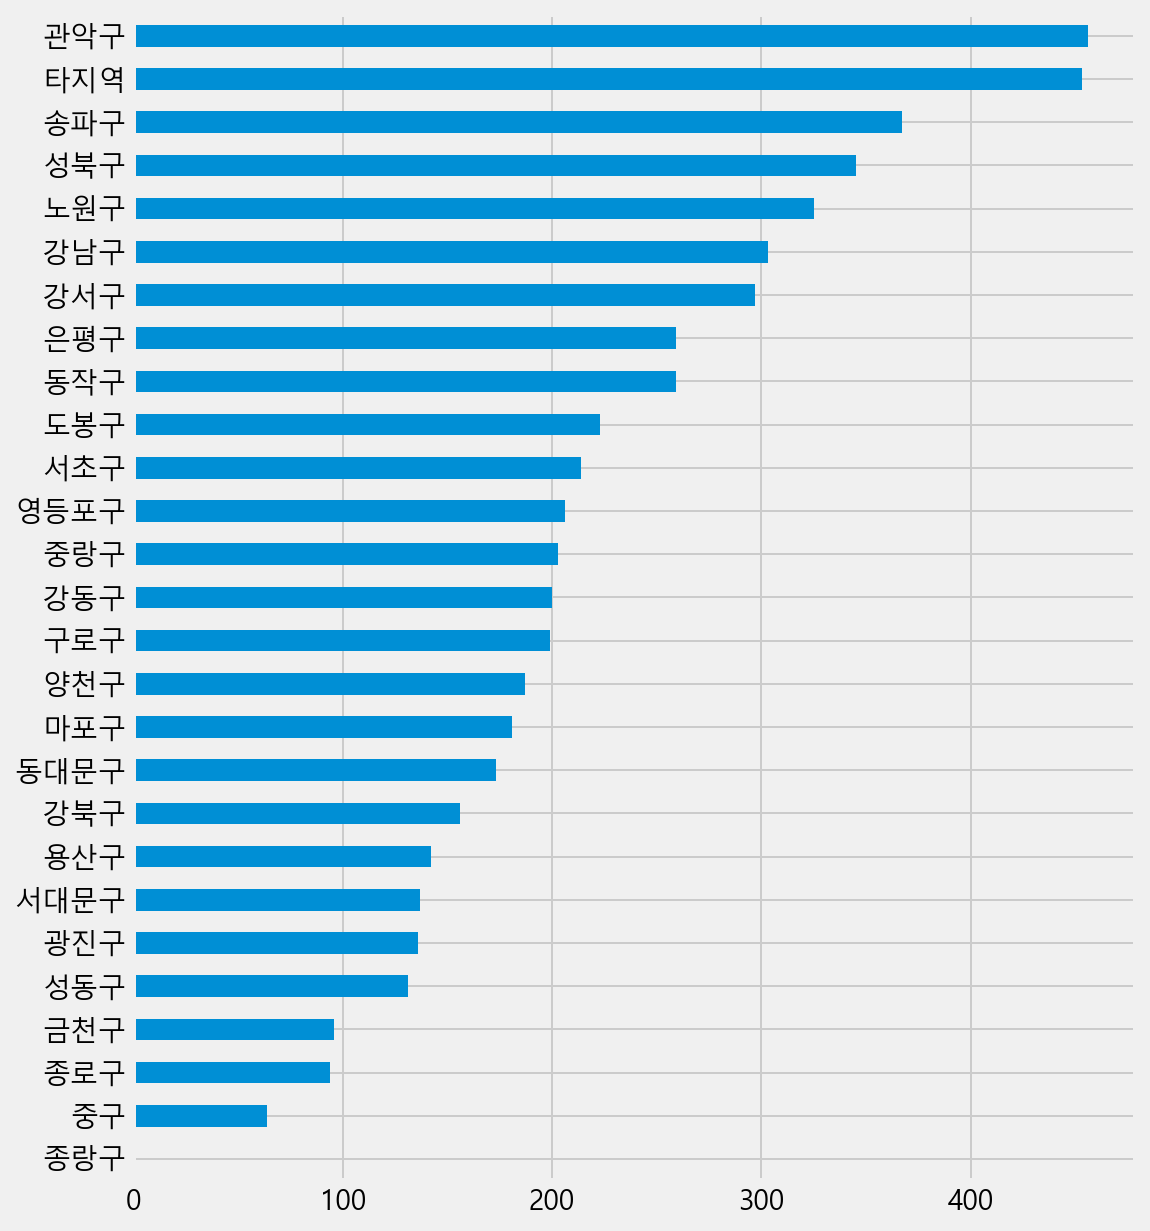

In [530]:
# 위에서 구한 빈도수를 막대그래프로 그립니다.
gu_etc_count.sort_values().plot.barh(figsize=(8,10))

## 8. 접촉력

**[15/24] 빈도수가 가장 많은 감염경로는?**

In [531]:
# 접촉력 빈도수를 구합니다.
df["접촉력"].value_counts().head(20)

기타 확진자 접촉        836
성북구 사랑제일교회 관련    641
확인 중             586
해외 접촉 추정         415
감염경로 조사중         387
타시도 확진자 접촉       249
이태원 클럽 관련        139
8.15서울도심집회       126
리치웨이 관련          119
도봉구 다나병원          68
구로구 콜센터 관련        60
노원구 빛가온교회 관련      46
성북구 체대입시 관련       43
요양시설 관련           43
양천구 운동시설 관련       43
확인중               42
용인시 우리제일교회 관련     41
구로구 교회 관련         41
강남구 K보건산업         37
콜센터직원 접촉          37
Name: 접촉력, dtype: int64

In [532]:
# 접촉력의 unique 값만 구합니다.
df["접촉력"].unique()

array(['기타 확진자 접촉', '타시도 확진자 접촉', '감염경로 조사중', '구로구 가족관련', '관악구 삼모스포렉스Ⅱ',
       '강남서초 지인모임', '서대문구 소재 장례식장', '해외 유입', '강남구 CJ텔레닉스',
       '도봉구 예마루데이케어센터', '도봉구 다나병원', '송파구 잠언의료기', '강남구 CJ텔레닉스 관련',
       '강동구 행복데이케어센터', '중랑구 이마트 상봉점', '해외 접촉 추정', '영등포구 방문판매업체 관련',
       '중구 소재 콜센터', '동작구 가족관련', '관악구 식당관련', '영등포구 소모임', '송파구 서민국수',
       '중구 소재 빌딩 관련', '마포구 서울디자인 고등학교', '타시도 확진자 접촉(강원강릉시지인모임)',
       '강남승광빌딩 관련', '관악구 사랑나무 어린이집', '관악구 큰믿음유신감리교회',
       '동대문구 성경모임(발산대우주어린이집)', '강북구 북서울 꿈의교회', '강남구 소재 대우디오빌플러스',
       '영등포구 LG트윈타워', '부산시 방문주사 관련', '서초구 소재 카페 관련', '관악구 지인모임',
       '동작구 부동산회사', '관악구 휘트니스 관련', '강남구 삼성화재', '양천구 양천경찰서', '서초구 LG 유플러스',
       '고양시부부관련', '관악구 가족 관련', '관악구 식당 관련', '고양시부부관련(마포구어린이집&서초구우체국)',
       '관악구가족 관련(가가호호데이케어센터)', '관악구 삼모스포렉스', '신도림 역사 관련', '강남구 디와이디벨로먼트',
       '동대문구 성경모임', '송파구 우리교회', '중랑구 서울의료원', '종로구 서울대병원', '성동구 덕수고 야구부',
       '프로그래머 지인모임', '강남구 신도벤처타워', '강남구 K보건산업', '건축설명회', '종로구청 관련',
       '강남구 통신판매업', '도봉구 소재 아파트 관련', '영등포 소재 증권회사', '서대

In [533]:
# "확인" 이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중', '확인중'], dtype=object)

In [541]:
# "조사중"이 들어가는 접촉력만 찾습니다.

df.loc[df["접촉력"].str.contains("조사중"), "접촉력"].unique()

array(['감염경로 조사중'], dtype=object)

In [534]:
# '확인 중', '확인중' => "확인 중" 으로 변경합니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"] = "확인 중"

In [542]:
# '감염경로 조사중' => "확인 중" 으로 변경합니다.
df.loc[df["접촉력"].str.contains("조사중"), "접촉력"] = "확인 중"

In [543]:
# "확인" 이 들어가는 접촉력만 찾습니다.
df.loc[df["접촉력"].str.contains("확인"), "접촉력"].unique()

array(['확인 중'], dtype=object)

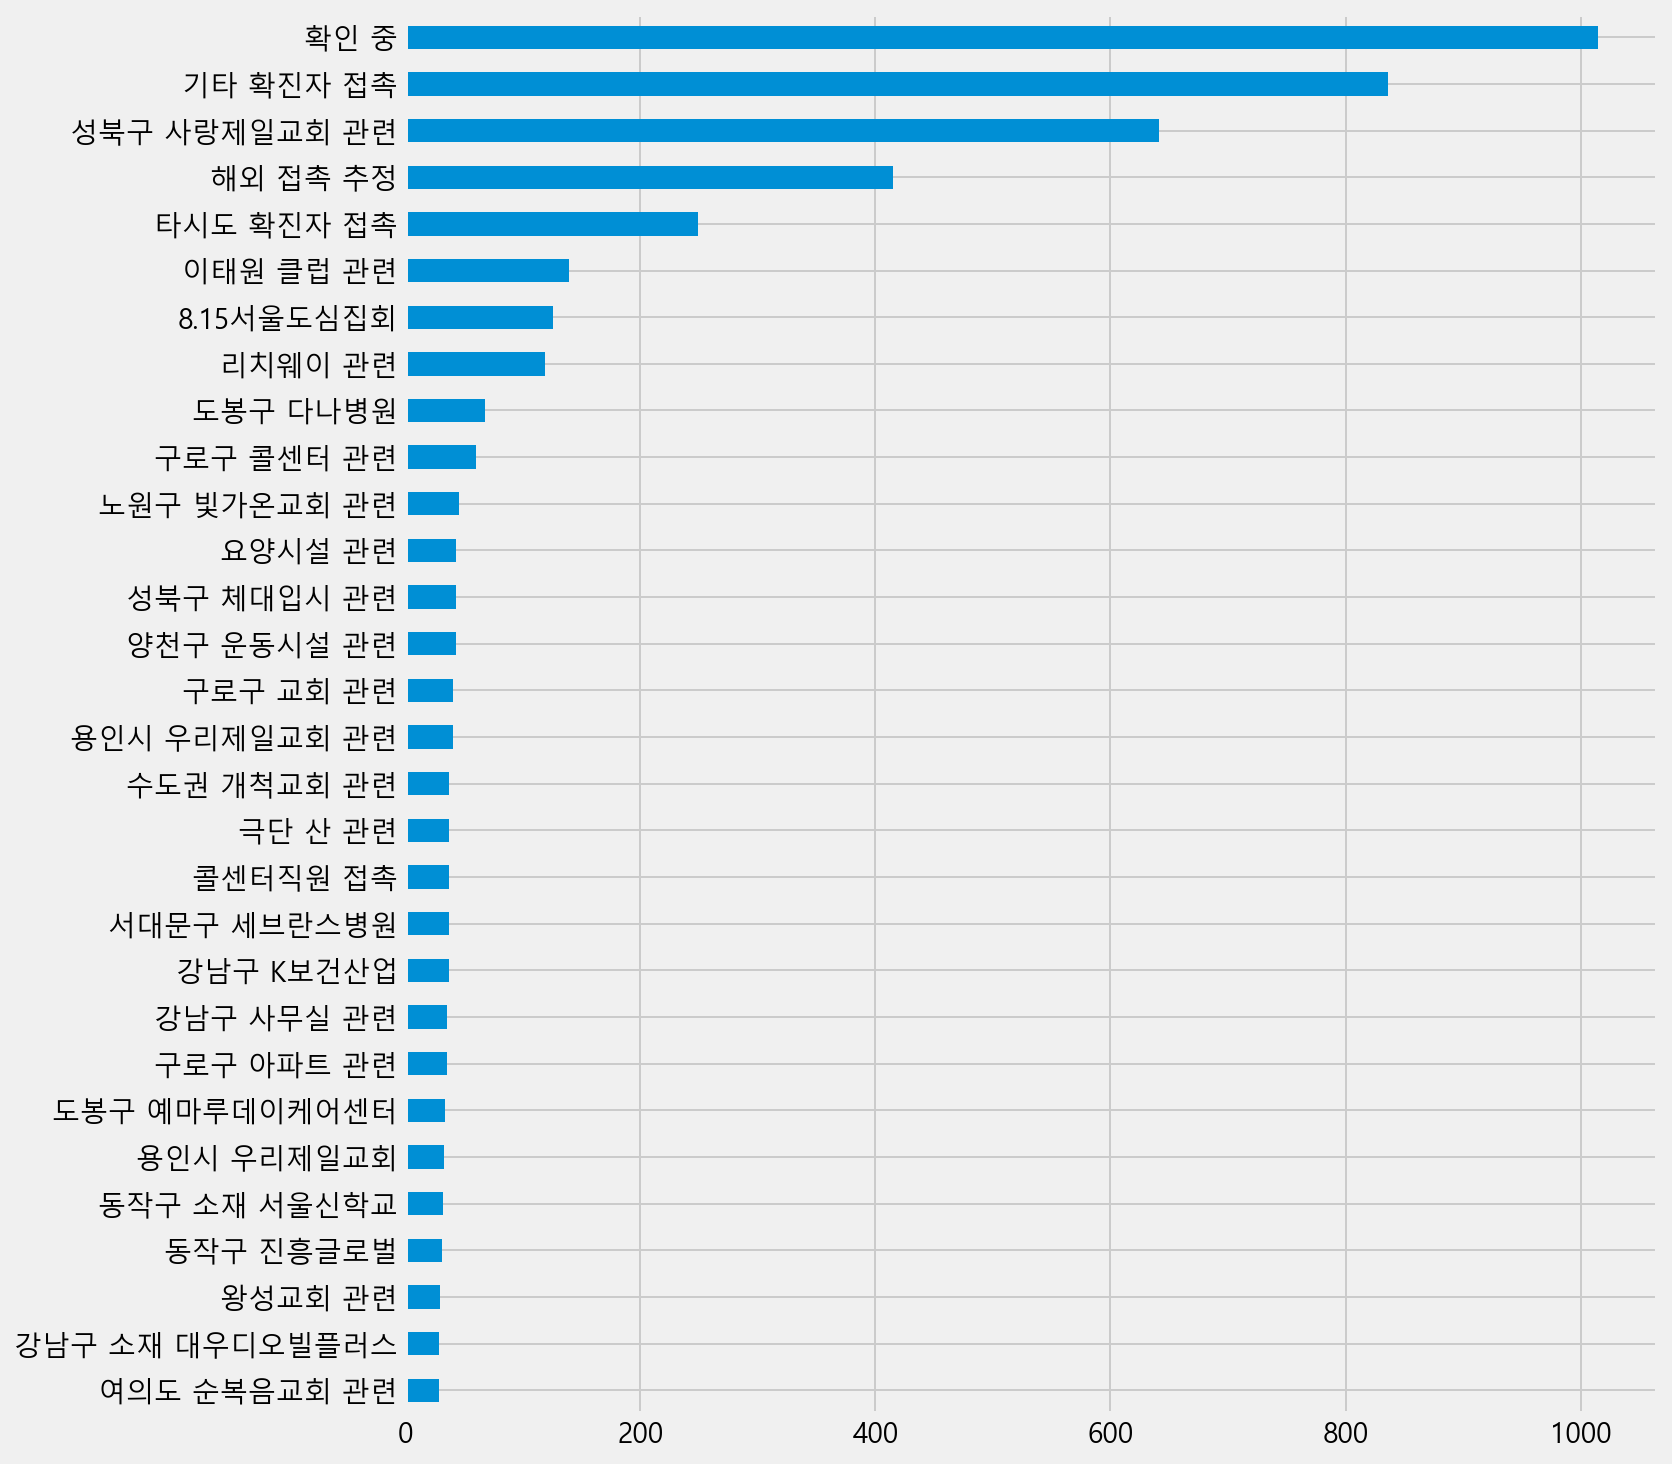

In [544]:
# 접촉력 빈도수를 시각화 합니다.
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(30)
contact_count_top.plot.barh(figsize=(10,12))

In [545]:
# 상위 15개만 구합니다.
top_contact = contact_count_top.tail(15)
top_contact

구로구 교회 관련          41
양천구 운동시설 관련        43
성북구 체대입시 관련        43
요양시설 관련            43
노원구 빛가온교회 관련       46
구로구 콜센터 관련         60
도봉구 다나병원           68
리치웨이 관련           119
8.15서울도심집회        126
이태원 클럽 관련         139
타시도 확진자 접촉        249
해외 접촉 추정          415
성북구 사랑제일교회 관련     641
기타 확진자 접촉         836
확인 중             1015
Name: 접촉력, dtype: int64

In [546]:
# 접촉력 빈도수가 높은 목록에 대한 index 값을 구해옵니다.

top_contact.index

Index(['구로구 교회 관련', '양천구 운동시설 관련', '성북구 체대입시 관련', '요양시설 관련', '노원구 빛가온교회 관련',
       '구로구 콜센터 관련', '도봉구 다나병원', '리치웨이 관련', '8.15서울도심집회', '이태원 클럽 관련',
       '타시도 확진자 접촉', '해외 접촉 추정', '성북구 사랑제일교회 관련', '기타 확진자 접촉', '확인 중'],
      dtype='object')

In [547]:
# 위에서 구한 top_contact 에 해당되는 데이터만 isin 으로 가져옵니다.
top_group = df[df["접촉력"].isin(top_contact.index)]
top_group.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
0,5807,25828,10.24.,타시도,-,기타 확진자 접촉,NaN,2020-10-24,10,43,10-24,타지역
1,5806,25821,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,강남구
2,5805,25806,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,강남구
3,5804,25790,10.24.,서대문구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,서대문구
4,5803,25799,10.24.,양천구,-,확인 중,NaN,2020-10-24,10,43,10-24,양천구


In [548]:
# 접촉력, 월별 빈도수를 groupby 로 구합니다.
top_group.groupby(["접촉력", "월"])["연번"].count().unstack().fillna(0).astype(int)

월,2,3,4,5,6,7,8,9,10
접촉력,,,,,,,,,
8.15서울도심집회,0,0,0,0,0,0,113,13,0
구로구 교회 관련,0,35,6,0,0,0,0,0,0
구로구 콜센터 관련,0,60,0,0,0,0,0,0,0
기타 확진자 접촉,0,0,0,0,0,1,422,309,104
노원구 빛가온교회 관련,0,0,0,0,0,0,35,11,0
도봉구 다나병원,0,0,0,0,0,0,0,33,35
리치웨이 관련,0,0,0,0,119,0,0,0,0
성북구 사랑제일교회 관련,0,0,0,0,0,0,628,13,0
성북구 체대입시 관련,0,0,0,0,0,0,39,4,0


### 8.1 이태원 클럽 관련
* 이태원 클럽 전파는 5월에 시작되었으나 6월에도 확진자가 있습니다.
* 6월에 이태원 클럽 관련 확진자를 찾아봅니다.

In [549]:
df[df["접촉력"].str.contains("이태원") & (df["월"] == 6)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4827,980,11785,6.06.,관악구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,관악구
4842,965,11742,6.06.,영등포구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,영등포구
4851,956,11751,6.06.,용산구,-,이태원 클럽 관련,퇴원,2020-06-06,6,23,06-06,용산구
4858,949,11709,6.05.,송파구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,송파구
4873,934,11687,6.05.,성동구,-,이태원 클럽 관련,퇴원,2020-06-05,6,23,06-05,성동구
4931,876,11535,6.01.,강동구,-,이태원 클럽 관련,퇴원,2020-06-01,6,23,06-01,강동구


### 8.2 감염경로 불분명

**[16/25] 감염경로를 모르는 확진수는 월과 주별로 어느 정도 차이가 있을까?**

In [550]:
# "접촉력"이 "확인 중"인 데이터만 구합니다.
df_unknown = df[df["접촉력"] == "확인 중"]
df_unknown.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역
4,5803,25799,10.24.,양천구,-,확인 중,NaN,2020-10-24,10,43,10-24,양천구
8,5799,25789,10.24.,송파구,-,확인 중,NaN,2020-10-24,10,43,10-24,송파구
9,5798,25796,10.24.,관악구,-,확인 중,NaN,2020-10-24,10,43,10-24,관악구
15,5792,25794,10.24.,타시도,-,확인 중,NaN,2020-10-24,10,43,10-24,타지역
16,5791,25792,10.24.,타시도,-,확인 중,NaN,2020-10-24,10,43,10-24,타지역


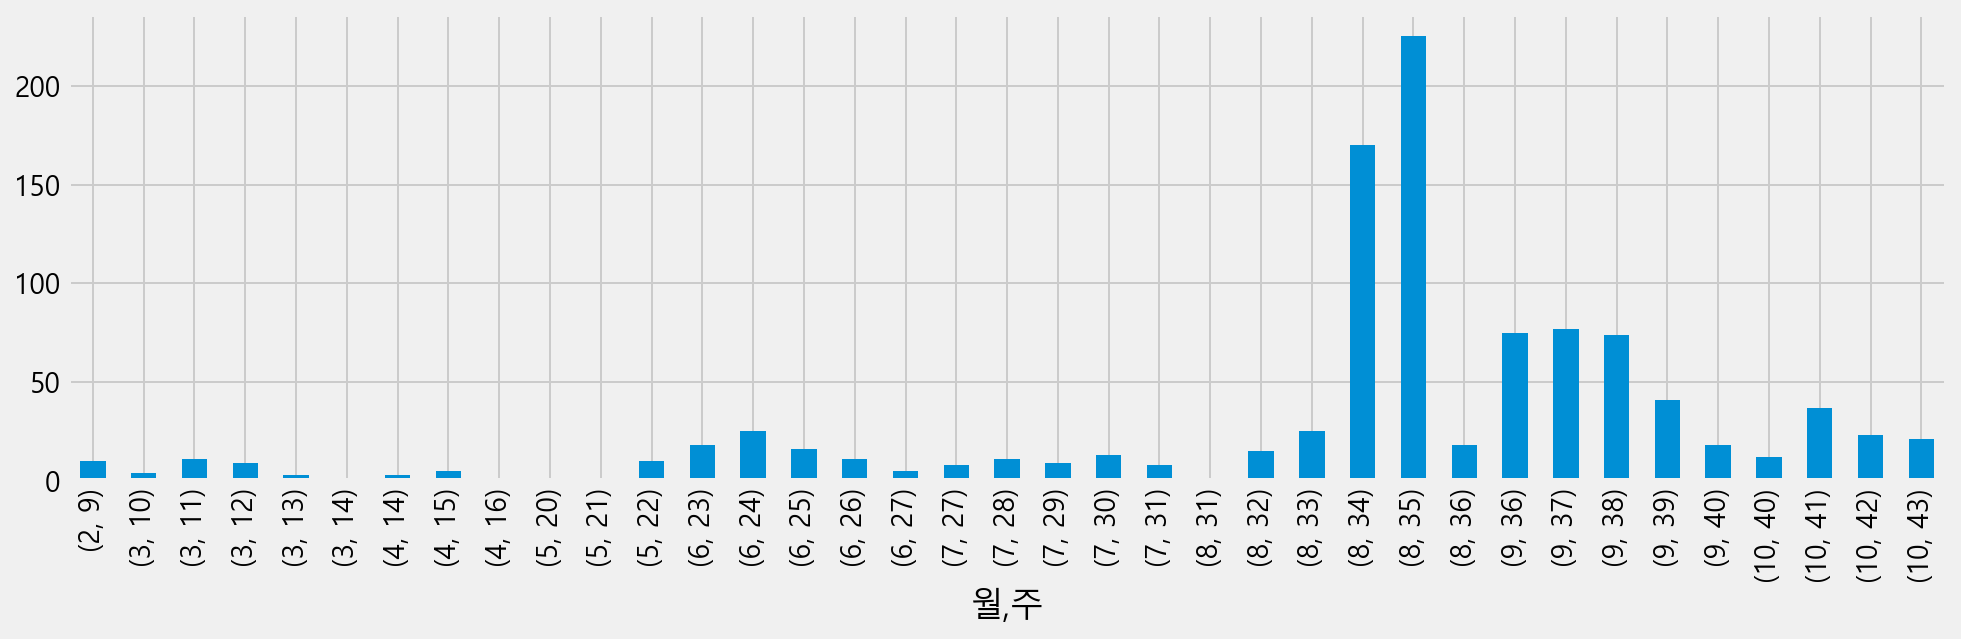

In [551]:
# 감염경로 불명이 어느 정도인지 봅니다.
unknown_weekly_case = df_unknown.groupby(["월", "주"])["연번"].count()
unknown_weekly_case.plot.bar(figsize=(15,4))

In [552]:
# 전체 확진수를 value_counts 로 구하고 데이터프레임 형태로 만듭니다.
# all_weekly_case
all_weekly_case = df["주"].value_counts().to_frame()
all_weekly_case.columns = ["전체확진수"]
all_weekly_case.head()

,전체확진수
35,924
34,913
36,458
33,390
37,341


In [553]:
# 전체 확진수를 value_counts 로 구하고 데이트프레임 형태로 만듭니다.
# unknown_weekly_case

unknown_weekly_case = df_unknown["주"].value_counts().to_frame()
unknown_weekly_case.columns = ["불명확진수"]
unknown_weekly_case.head()

,불명확진수
35,225
34,170
36,93
37,77
38,74


In [554]:
# all_weekly_case 와 unknown_weekly_case 를 비교해 봅니다.

unknown_case = all_weekly_case.merge(unknown_weekly_case, left_index=True, right_index=True)
unknown_case = unknown_case.sort_index()
unknown_case.head()

,전체확진수,불명확진수
9,62,10
10,37,4
11,124,11
12,76,9
13,105,3


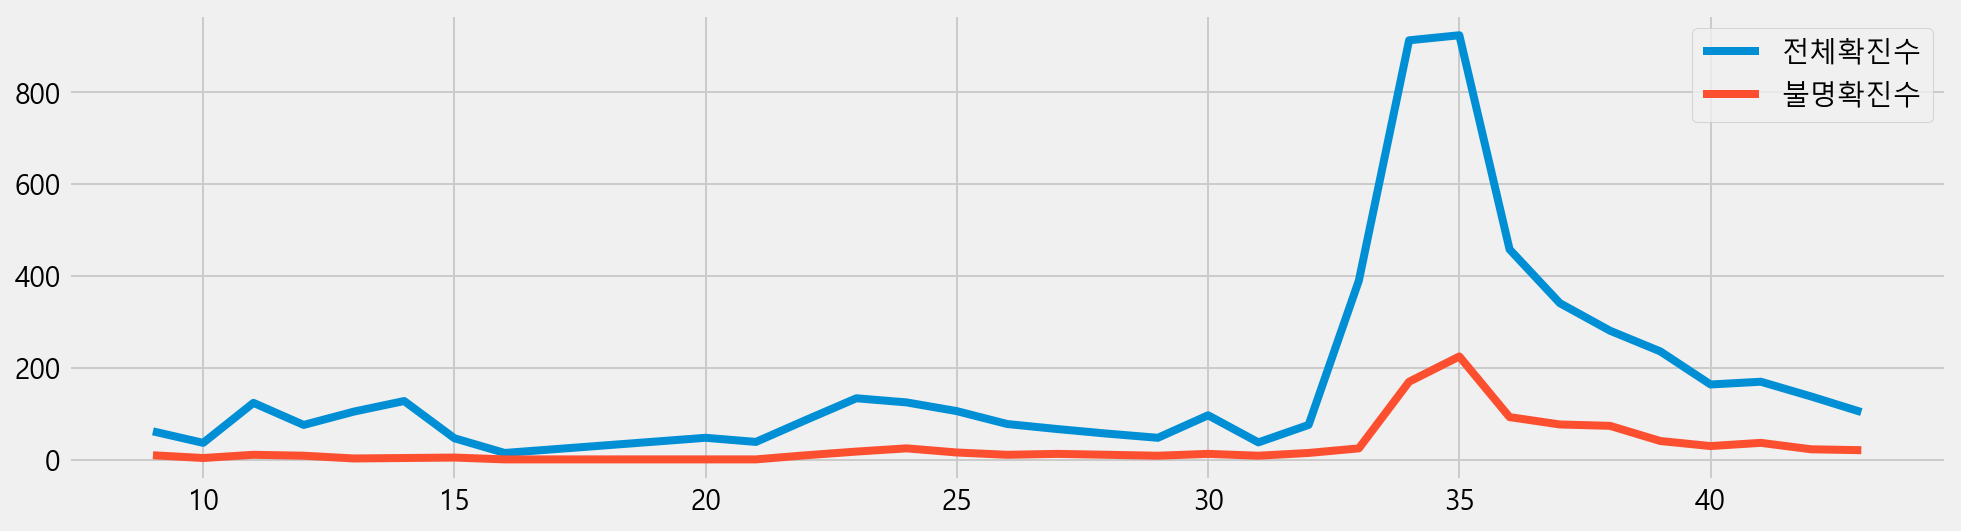

In [555]:
# 위에서 구한 결과를 시각화 합니다.
unknown_case.plot(figsize=(15,4))

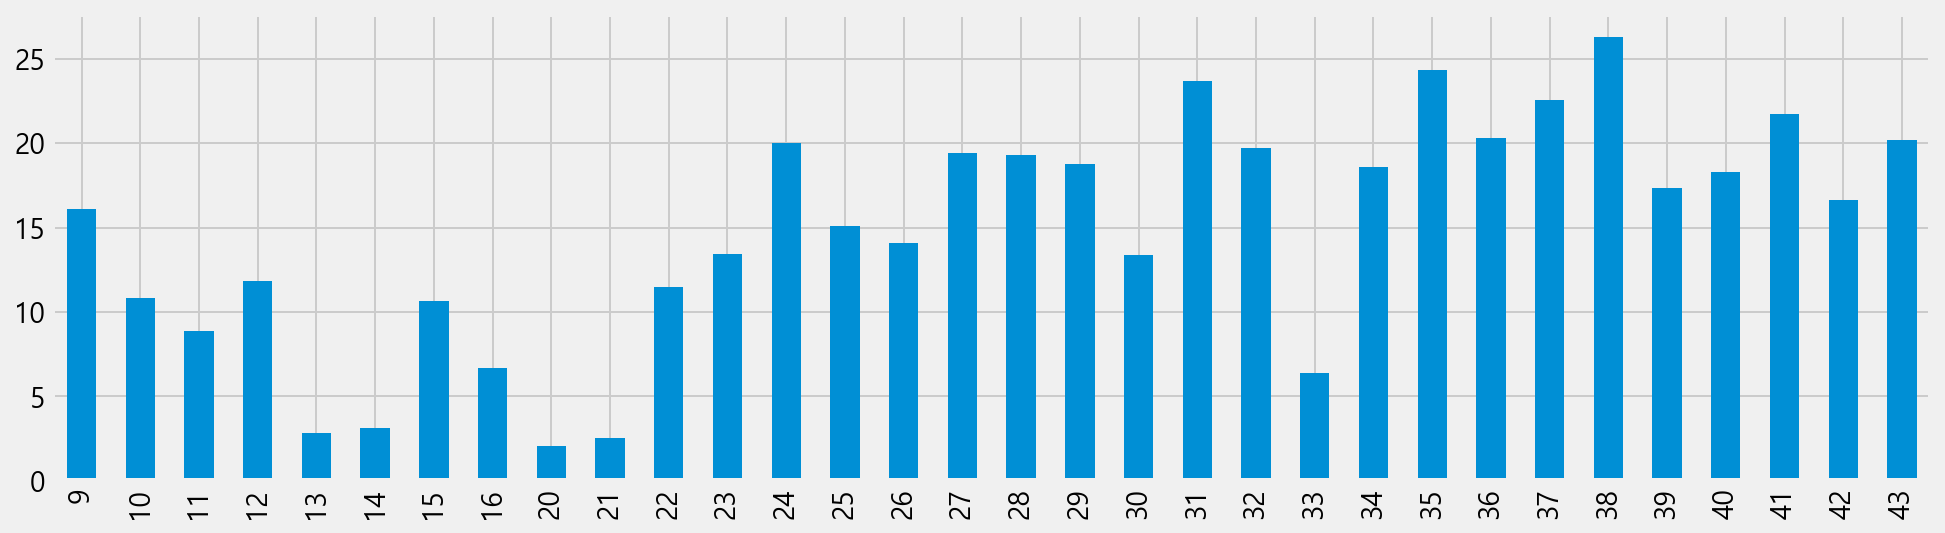

In [556]:
# 감염경로 "확인 중" 의 주별 비율
unknown_case["확인중비율"] = (unknown_case["불명확진수"] / unknown_case["전체확진수"]) *100
unknown_case["확인중비율"].plot.bar(figsize=(15, 4))

## 9. 가장 많은 전파가 일어난 번호

**[17/25] 텍스트 안에 있는 접촉번호는 어떻게 추출해야 될까?**

* 정규 표현식 - 위키백과, 우리 모두의 백과사전


* 파이썬 공식문서 정규표현식 참고하기:
    * https
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https
    
    
* 정규표현식 문자열 패턴
    * https
    
    
* []: 일치시킬 문자 세트의 패턴
* [가나다]: 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣]: 한글 가부터 힣까지의 문자 중 하나를 포함하고 있는지
* [0-9]: 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9]: 숫자를 포함하고 있지 않음
* [^가-힣]: 한글이 포함되어 있지 않음
* [가-힣+]: 한글이 하나 이상 포함되는지

In [557]:
import re
# 정규표현식 라이브러리를 불러옵니다.
# 숫자 외의 데이터는 제거하는 정규표현식
# #7265 접촉(추정)

In [558]:
# 함수를 통해 숫자 외의 문자를 제거하는 get_number 함수를 만듭니다.

def get_number(text):
    return re.sub("[^0-9]", "", text)

get_number("#7265 접촉(추정)")


'7265'

In [559]:
# 함수를 map 을 통해 접촉번호를 구합니다.
df["접촉번호"] = df["접촉력"].map(get_number)
contact = df["접촉번호"].value_counts().reset_index()
contact.head()

,index,접촉번호
0,,5588
1,815,126
2,6,4
3,9,4
4,9734,4


In [560]:
# 접촉번호가 없는 0번 행은 drop 으로 삭제합니다.
# 한번 drop 한 셀으르 다시 drop 하면 이미 삭제를 했는데 다시 삭제하려 하기 때문에 Keyerror가 납니다.
# 다시 실행했을 때 KeyError 가 발생하는 것이 정상입니다.

df_contact = contact.drop(0)
df_contact = df_contact.head(10)
df_contact

,index,접촉번호
1,815,126
2,6,4
3,9,4
4,9734,4
5,8791,3
6,780,3
7,14483,3
8,8486,3
9,8271,3
10,9287,2


In [561]:
# 상위 10개의 접촉번호를 구해서 top_contact_no 변수에 할당하고 재사용합니다.

op_contact_no = df_contact["index"]

In [562]:
# contact 의 환자번호와 df의 접촉번호를 merge 합니다.

df[df["접촉번호"].isin(op_contact_no)]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호
847,4960,22951,9.19.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-19,9,38,09-19,송파구,9
914,4893,22755,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
915,4892,22756,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
916,4891,22757,9.17.,송파구,-,9월 송파구 지인모임,퇴원,2020-09-17,9,38,09-17,송파구,9
1133,4674,22192,9.13.,마포구,-,8.15서울도심집회,사망,2020-09-13,9,37,09-13,마포구,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,33,797,2.24.,송파구,-,#780 접촉(추정),퇴원,2020-02-24,2,9,02-24,송파구,780
5790,17,83,2.20.,종로구,-,#6 접촉(추정),퇴원,2020-02-20,2,8,02-20,종로구,6
5797,10,21,2.5.,성북구,-,#6 접촉,퇴원,2020-02-05,2,6,02-05,성북구,6
5800,7,11,1.31.,종로구,-,#6 접촉,퇴원,2020-01-31,1,5,01-31,종로구,6


## 10. 조치사항

**[18/25] 조치사항에서 퇴원여부의 빈도수 구하기**

In [563]:
# 조치사항에 대한 빈도수를 세어봅니다.
# value_counts 는 Series 에만 사용할 수 있습니다.
# 단일 변수의 빈도수를 세는 데 사용합니다.

df["퇴원현황"].value_counts()

퇴원    5350
사망      74
Name: 퇴원현황, dtype: int64

## 11. 퇴원, 사망여부

In [564]:
# 조치사항 컬럼을 통해 퇴원과 사망 컬럼을 새로 만듭니다.
# 또, 어느 병원에 조치되었는지도 병원 컬럼을 만들어서 담습니다.

df["퇴원"] = df["퇴원현황"].str.contains("퇴원")
df["사망"] = df["퇴원현황"].str.contains("사망")
df["병원"] = df["퇴원현황"].isnull()


In [565]:
# 데이터 수집 시점에서 퇴원하지 못한 환자 수
df["퇴원"].value_counts()

True     5350
False      74
Name: 퇴원, dtype: int64

In [566]:
# 퇴원 여부 빈도수에 대한 비율을 구합니다.
df["퇴원"].value_counts(normalize=True)

True     0.986357
False    0.013643
Name: 퇴원, dtype: float64

In [567]:
# 사망여부에 따른 빈도수를 구합니다.
df["사망"].value_counts()

False    5350
True       74
Name: 사망, dtype: int64

In [568]:
# 사망 여부에 따른 빈도수의 비율을 구합니다.
df["사망"].value_counts(normalize=True) *100

False    98.635693
True      1.364307
Name: 사망, dtype: float64

In [570]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
0,5807,25828,10.24.,타시도,-,기타 확진자 접촉,NaN,2020-10-24,10,43,10-24,타지역,,NaN,NaN,True
1,5806,25821,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,강남구,,NaN,NaN,True
2,5805,25806,10.24.,강남구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,강남구,,NaN,NaN,True
3,5804,25790,10.24.,서대문구,-,타시도 확진자 접촉,NaN,2020-10-24,10,43,10-24,서대문구,,NaN,NaN,True
4,5803,25799,10.24.,양천구,-,확인 중,NaN,2020-10-24,10,43,10-24,양천구,,NaN,NaN,True


* 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

In [571]:
# 데이터 수집 시점 기준 현재까지 입원해 있는 확진자 중 가장 오래 입원해 있는 확진자

df[(df["퇴원"].isnull()) & (df["사망"].isnull()) & (df["지역"] != "타지역")].tail(5)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원
2888,2919,17496,8.23.,양천구,-,기타 확진자 접촉,NaN,2020-08-23,8,34,08-23,양천구,,NaN,NaN,True
3216,2591,16415,8.20.,노원구,-,성북구 사랑제일교회 관련,NaN,2020-08-20,8,34,08-20,노원구,,NaN,NaN,True
3284,2523,16655,8.20.,도봉구,-,확인 중,NaN,2020-08-20,8,34,08-20,도봉구,,NaN,NaN,True
3519,2288,15980,8.18.,동대문구,-,마포구 푸본생명콜센터,NaN,2020-08-18,8,34,08-18,동대문구,,NaN,NaN,True
4271,1536,13963,7.23.,송파구,-,송파구 교회관련,NaN,2020-07-23,7,30,07-23,송파구,,NaN,NaN,True


## 12. 병원
병원데이터 없음

**[19/25] 어느 병원에서 확진자를 가장 많이 치료했을까요?**

In [572]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df["병원"].describe()

count      5807
unique        2
top       False
freq       5424
Name: 병원, dtype: object

In [576]:
# 병원의 빈도수를 구합니다.

hospital_count = df["병원"].value_counts()

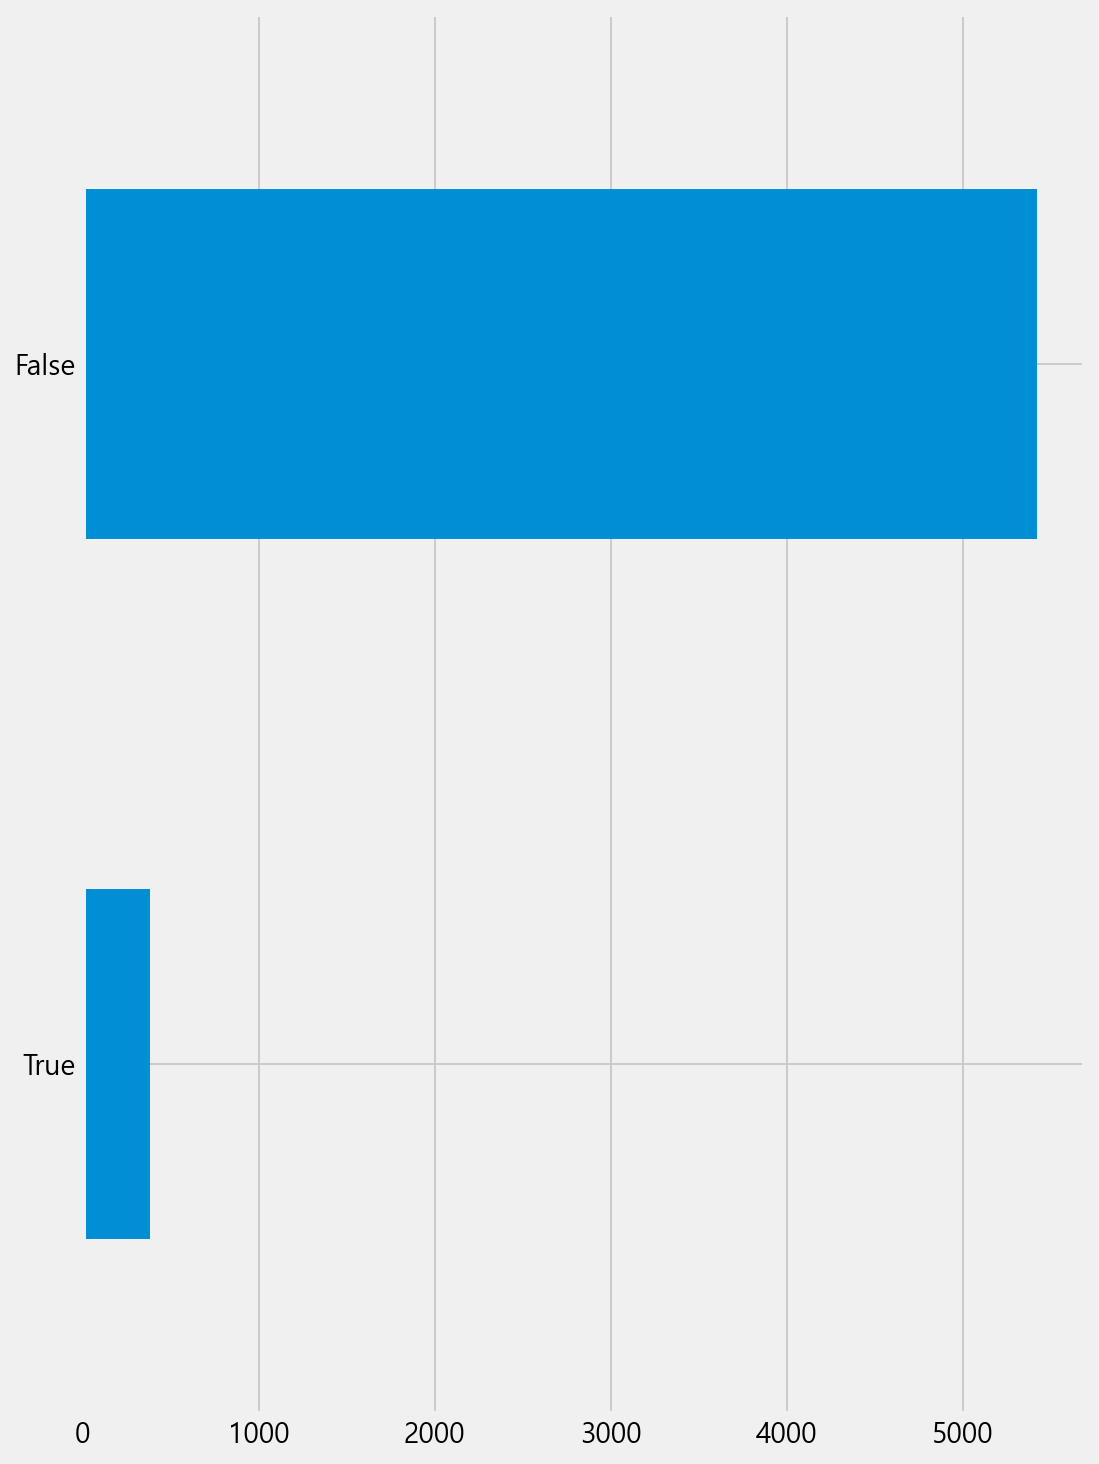

In [577]:
# 병원별 빈도수를 막대그래프로 표현합니다.

hospital_count.sort_values().plot.barh(figsize=(8,12))

In [578]:
# 입원환자가 많은 병원을 구합니다.
top_hospital_index = hospital_count.head(10)

In [579]:
hospital_gu = df.groupby(["지역", "병원"])["연번"].count().unstack()

### 12.1 iloc 로 일부 데이터만 보기

* iloc 와 loc 의 차이

In [580]:
# 전체 데이터를 보기에 너무 많을 수 있기 때문에 iloc 를 사용해서 일부 데이터만 봅니다.

hospital_gu.fillna(0).iloc[8:, 8:]

병원
지역
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구


In [583]:
# hospital_gu.loc[["강남구", "강서구", ["강남성심병원", "서울의료원"]]
hospital_gu.loc[["강남구", "강서구", top_hospital_index]

SyntaxError: unexpected EOF while parsing (<ipython-input-583-5f3547d8dafc>, line 2)

### 12.2 pandas style 적용하기

In [589]:
hospital_gu_heatmap = hospital_gu.fillna(0).astype(int)
hospital_gu_heatmap.style.background_gradient()
# hospital_gu_heatmap[top_hospital_index].style.background_gradient()

병원,False,True
지역,,
강남구,272,31
강동구,192,8
강북구,152,4
강서구,291,6
관악구,412,44
광진구,133,3
구로구,187,12
금천구,94,2
노원구,311,14


In [590]:
# 전체 병원이 너무 많기 때문에 환자가 많은 병원만 따로 봅니다.
# 행과 열을 바꿈 T
# hospital_gu_heatmap[top_hospital_index].T.style.background_gradient()

## 13. 여행력

**[20/25] 해외유입은 어느 지역이 많을까요? 구별로 해외 유입 국가에 대한 차이가 있을까요?**

In [602]:
# "해외" 라는 컬럼을 만들어 데이터를 전처리 합니다.
# "여행력"에 "-" 문자가 들어가 있으면 결측치로 처리합니다.

# df["해외"] 만들기. 실수 대비를 위해서.
df["해외"] = df["여행력"]
# 앞뒤 공백 제거
df["해외"].str.strip()

# df["해외"].str.replace() -- 'str' 넣으면, 포함할 경우는 다 바꿔준다.
df["해외"] = df["해외"].replace("-", np.nan)

df["해외"].unique()

array([nan, '방글라데시', '키르기스스탄', '미국', '인도', '이란', '체코', '폴란드', '프랑스',
       '필리핀', '일본', '브라질', '우즈베키스탄', '요르단', '쿠웨이트', '인도네시아', '우간다', '몰타',
       '영국', '네팔', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이', '멕시코, 미국',
       '카자흐스탄', '독일', '중국', '이집트', '21263', '터키', '사우디아라비아', '베트남',
       '에티오피아', '스페인', '케냐', '멕시코', '홍콩', '러시아', '이라크', '모로코, 터키',
       '나이지리아', '미국, 멕시코', '페루', '아랍에미리트', 'UAE', '파키스탄', '아일랜드',
       '콩코, 프랑스', '캐나다', '페루, 미국', '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우',
       '호주, 인도네시아', '이탈리아', '포르투칼', '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아',
       '미국, 브라질', '태국', '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라',
       '브라질, 아르헨티아, 칠레, 볼리비아', '프랑스, 독일', '미국, 캐나다', '스페인, 카타르',
       '이탈리아, 프랑스', '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아',
       '영국, 프랑스', '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스',
       '이탈리아, 독일, 홍콩', '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

In [618]:
# describe 로 요약을 합니다.
# count : 빈도수
# unique : 병원수
# top : 가장 많은 빈도로 등장하는 텍스트
# freq : 가장 많은 빈도의 횟수

df["해외"].describe()

count     460
unique     82
top        미국
freq      153
Name: 해외, dtype: object

In [619]:
df["해외"].value_counts().head()

미국     153
영국      50
필리핀     25
인도      13
프랑스     13
Name: 해외, dtype: int64

### 13.1 여행력이 있는 데이터만 가져와서 서브셋 만들기

In [620]:
# "해외" 칼럼의 값이 결측치가 아닌 데이터만 가져와서
df["해외"].notnull()
# df_oversea 라는 새로운 데이터프레임에 담습니다.
# copy ?
df_oversea = df[df["해외"].notnull()].copy()
df_oversea.shape

(460, 17)

In [621]:
# 중복되는 지역명이 있는지 확인합니다.
df_oversea["해외"].unique()

array(['방글라데시', '키르기스스탄', '미국', '인도', '이란', '체코', '폴란드', '프랑스', '필리핀',
       '일본', '브라질', '우즈베키스탄', '요르단', '쿠웨이트', '인도네시아', '우간다', '몰타', '영국',
       '네팔', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이', '멕시코, 미국', '카자흐스탄',
       '독일', '중국', '이집트', '21263', '터키', '사우디아라비아', '베트남', '에티오피아', '스페인',
       '케냐', '멕시코', '홍콩', '러시아', '이라크', '모로코, 터키', '나이지리아', '미국, 멕시코',
       '페루', '아랍에미리트', 'UAE', '파키스탄', '아일랜드', '콩코, 프랑스', '캐나다', '페루, 미국',
       '프랑스, 스페인, 독일, 이탈리아, 네덜란드', '팔라우', '호주, 인도네시아', '이탈리아', '포르투칼',
       '미국, 캐나다, 멕시코', '미국 뉴욕', '오스트리아', '미국, 브라질', '태국',
       '아르헨티나, 볼리비아, 브라질', '말레이시아', '필리핀, 마닐라', '브라질, 아르헨티아, 칠레, 볼리비아',
       '프랑스, 독일', '미국, 캐나다', '스페인, 카타르', '이탈리아, 프랑스',
       '체코, 헝가리, 오스트리아, 이탈리아, 프랑스', '모로코, 프랑스, 오스트리아', '영국, 프랑스',
       '스페인,체코', '독일,프랑스', '프랑스, 스페인', '스페인, 프랑스', '이탈리아, 독일, 홍콩',
       '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'], dtype=object)

### 13.2 텍스트 데이터 다루기
Working with text data - pandas documentation

In [623]:
# 유럽 지역을 방문했다면 유럽이라고 바꿔주기 위해 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
europe = "체코, 폴란드, 프랑스, 영국, 독일, 터키, 아일랜드, 스페인, 이탈리아, 네덜란드"
europe = europe.replace(", ", "|")
df_oversea[df_oversea["해외"].str.contains(europe)].head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,확진일자,월,주,월일,지역,접촉번호,퇴원,사망,병원,해외
112,5695,25228,10.18.,용산구,체코,해외 유입,NaN,2020-10-18,10,42,10-18,용산구,,NaN,NaN,True,체코
113,5694,25229,10.18.,용산구,체코,해외 유입,NaN,2020-10-18,10,42,10-18,용산구,,NaN,NaN,True,체코
156,5651,25042,10.16.,강서구,폴란드,해외 접촉 추정,NaN,2020-10-16,10,42,10-16,강서구,,NaN,NaN,True,폴란드
174,5633,24995,10.15.,용산구,체코,해외 유입,NaN,2020-10-15,10,42,10-15,용산구,,NaN,NaN,True,체코
186,5621,24959,10.14.,성북구,프랑스,해외 유입,NaN,2020-10-14,10,42,10-14,성북구,,NaN,NaN,True,프랑스


In [626]:
# 남미 지역에 해당되는 국가명을 str.contains 로 검색하기 위한 형태로 만듭니다.
south_america = "브라질, 아르헨티나, 칠레, 볼리비아, 멕시코, 페루, 에콰도르, 파라과이"
south_america = south_america.replace(", ", "|")
# 파이썬 series와 판다스의 문자열은 다르다.
south_america

'브라질|아르헨티나|칠레|볼리비아|멕시코|페루|에콰도르|파라과이'

In [638]:
# 중복되는 국가나 지역을 특정 텍스트로 변경해서 그룹화 해서 빈도수를 세어볼 예정입니다.
# .str.contains 와 .loc 를 사용해서 전처리 합니다.
df_oversea[df_oversea["해외"].str.contains(europe)]

df_oversea.loc[df_oversea["해외"].str.contains(europe), "해외"] = "유럽"
df_oversea.loc[df_oversea["해외"].str.contains("중국|우한"), "해외"] = "중국"
df_oversea.loc[df_oversea["해외"].str.contains("아랍에미리트"), "해외"] = "UAE"
df_oversea.loc[df_oversea["해외"].str.contains("필리핀"), "해외"] = "필리핀"
df_oversea.loc[df_oversea["해외"].str.contains("미국"), "해외"] = "미국"
df_oversea.loc[df_oversea["해외"].str.contains("호주"), "해외"] = "호주"

df_oversea["해외"].value_counts()

미국         155
유럽         113
필리핀         27
남미          26
인도          13
우즈베키스탄      13
카자흐스탄       10
일본          10
이라크         10
중국           9
인도네시아        7
키르기스스탄       6
태국           6
캐나다          5
러시아          5
UAE          5
방글라데시        4
파키스탄         4
베트남          3
네팔           3
이집트          2
사우디아라비아      2
팔라우          2
우크라이나        2
쿠웨이트         2
몰타           1
호주           1
케냐           1
카타르          1
키르기즈스탄       1
오스트리아        1
요르단          1
에티오피아        1
말레이시아        1
우간다          1
21263        1
나이지리아        1
싱가포르         1
홍콩           1
이란           1
포르투칼         1
Name: 해외, dtype: int64

In [677]:
df_oversea["해외"].describe()

count     460
unique     41
top        미국
freq      155
Name: 해외, dtype: object

In [678]:
# 확진일자, 해외 별 카운트 수를 구합니다.

day_oversea = df_oversea.groupby(["확진일자", "해외"])["연번"].count()
day_oversea.head()

확진일자        해외  
2020-01-24  중국      1
2020-01-30  중국      2
2020-02-02  중국      1
2020-02-05  싱가포르    1
2020-02-06  중국      1
Name: 연번, dtype: int64

In [679]:
# 위에서 구한 값을 바탕으로 지역별 누적 확진수를 구합니다.

day_oversea = day_oversea.groupby(level=[1]).cumsum()

In [680]:
# 위에서 구한 값을 reset_index() 를 통해 데이터프레임으로 변경하고 "연번" 컬럼을 "확진자수"로 변경합니다.
df_day_oversea = day_oversea.reset_index()
df_day_oversea = df_day_oversea.rename(columns={"연번":"누적확진수"})
df_day_oversea.head()

,확진일자,해외,누적확진수
0,2020-01-24,중국,1
1,2020-01-30,중국,3
2,2020-02-02,중국,4
3,2020-02-05,싱가포르,1
4,2020-02-06,중국,5


In [681]:
# "해외" 컬럼의 빈도수를 구합니다.
oversea_count = df_oversea["해외"].value_counts()
oversea_count

미국         155
유럽         113
필리핀         27
남미          26
인도          13
우즈베키스탄      13
카자흐스탄       10
일본          10
이라크         10
중국           9
인도네시아        7
키르기스스탄       6
태국           6
캐나다          5
러시아          5
UAE          5
방글라데시        4
파키스탄         4
베트남          3
네팔           3
이집트          2
사우디아라비아      2
팔라우          2
우크라이나        2
쿠웨이트         2
몰타           1
호주           1
케냐           1
카타르          1
키르기즈스탄       1
오스트리아        1
요르단          1
에티오피아        1
말레이시아        1
우간다          1
21263        1
나이지리아        1
싱가포르         1
홍콩           1
이란           1
포르투칼         1
Name: 해외, dtype: int64

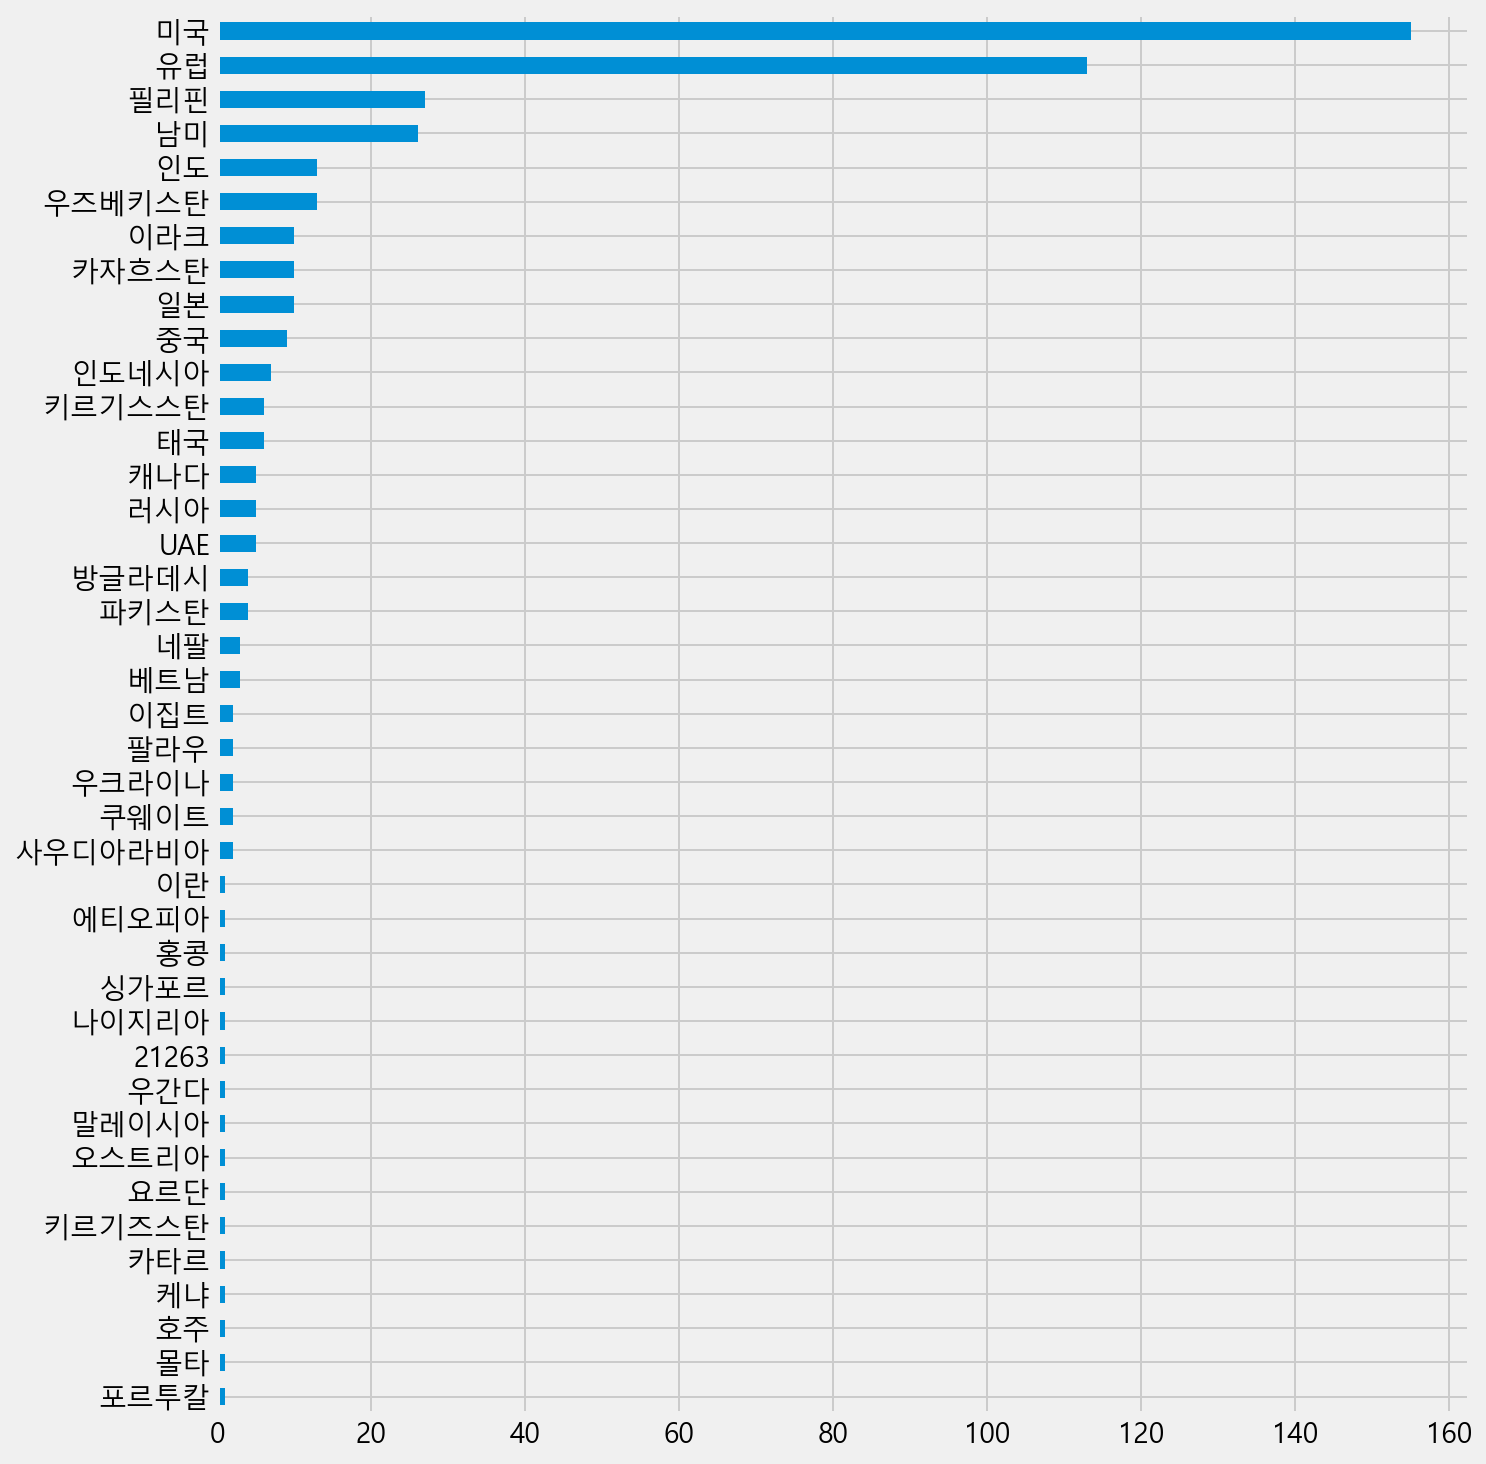

In [682]:
# 위에서 구한 빈도수를 시각화 합니다.
oversea_count.sort_values().plot.barh(figsize=(10,12))

In [683]:
df_day_oversea = df_day_oversea.set_index("확진일자")

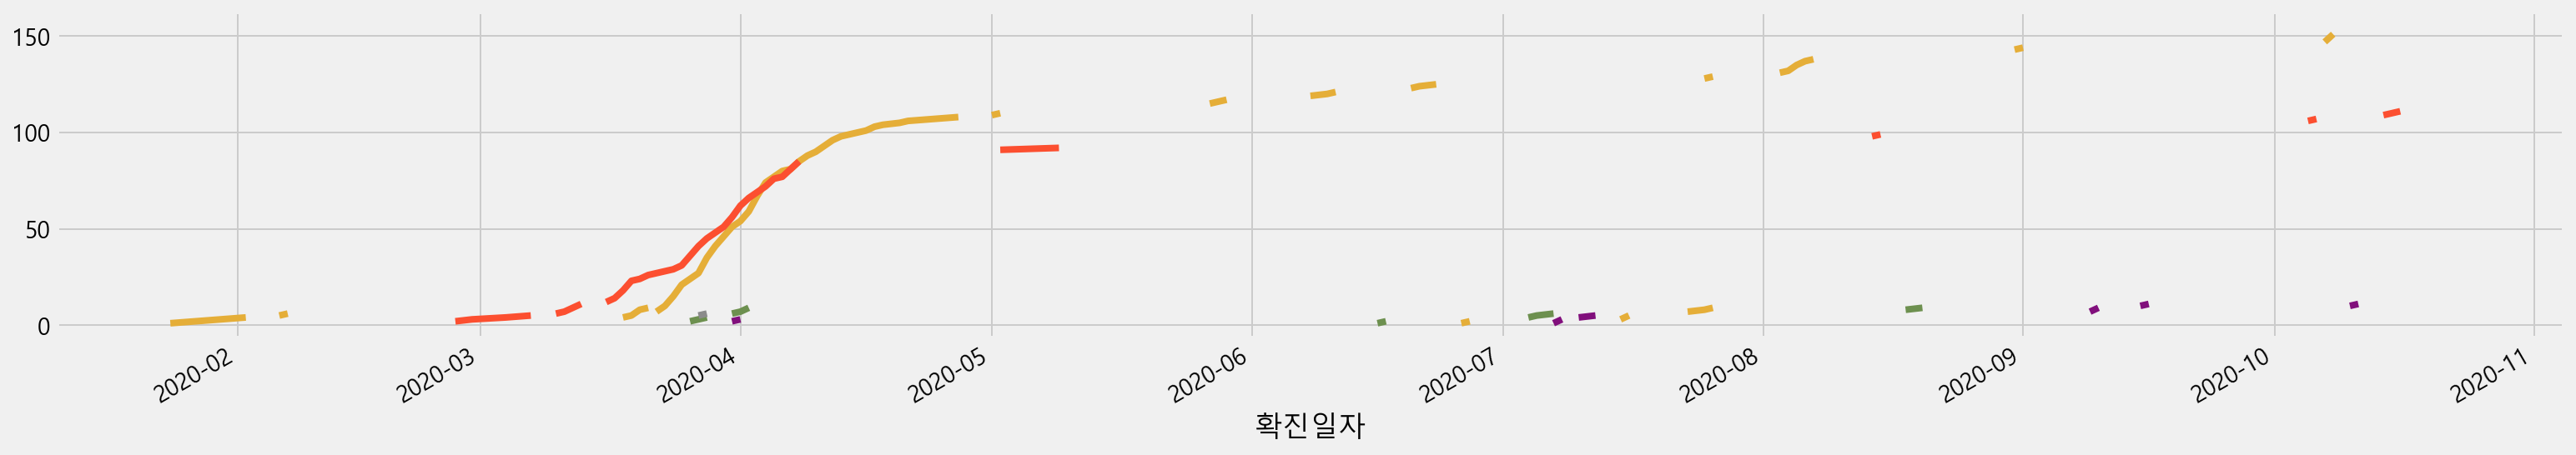

In [689]:
df_day_oversea.pivot(columns="해외").plot(figsize=(24,4), legend=False)

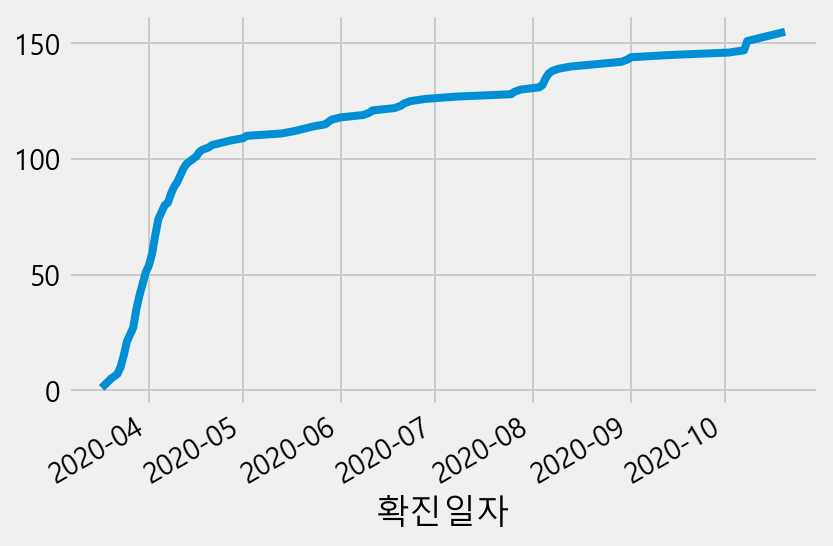

In [692]:
df_day_oversea.loc[df_day_oversea["해외"] == "미국", "누적확진수"].plot()

**[22/25] 전체 확진자 중 해외 유입 비율은 구마다 얼마나 차이가 있을까요?**

In [698]:
oversea_count_gu = df_oversea["지역"].value_counts()
oversea_count_gu.head()

타지역    55
강남구    49
용산구    31
마포구    30
동작구    26
Name: 지역, dtype: int64

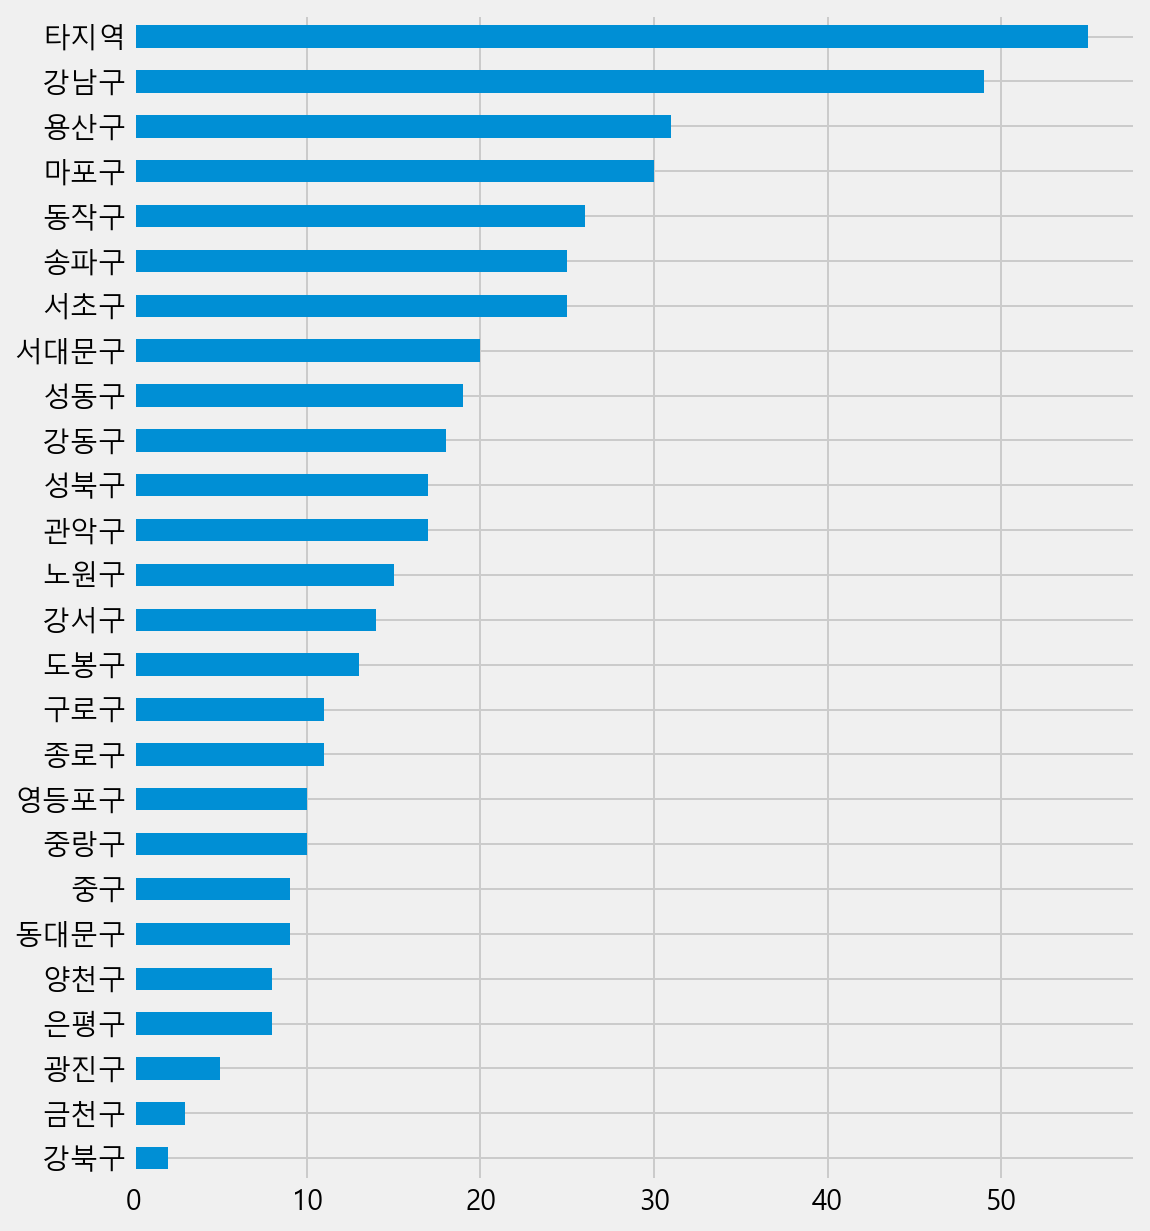

In [706]:
# "해외유입 구별 확진자" 시각화 하기
oversea_count_gu.sort_values().plot.barh(figsize=(8,10))

### 13.3 전체 확진수와 해외유입 확진수 비교

In [712]:
# all_count_gu 변수에 전체 지역의 확진자수 구하기
all_count_gu = df["지역"].value_counts()
all_count_gu.head()

관악구    456
타지역    453
송파구    367
성북구    345
노원구    325
Name: 지역, dtype: int64

In [716]:
# 데이터프레임으로 변환하고 컬럼명 변경하기
# pd.DataFrame({"해외확진수": oversea_count_gu, "전체확진수": all_count_gu})
df_all_gu = all_count_gu.to_frame()
df_all_gu.columns = ["전체확진수"]
df_all_gu.head()

,전체확진수
관악구,456
타지역,453
송파구,367
성북구,345
노원구,325


In [717]:
# 해외유입확진수 구하기
df_oversea_gu = pd.DataFrame({"해외유입확진수": oversea_count_gu})

### 13.4 merge 를 통해 전체 확진수와 해외유입 확진수 비교하기

In [720]:
# merge 로 합쳐서 전체확진수와 해외유입확진수 비교해 보기
df_all_oversea_case = df_all_gu.merge(df_oversea_gu, left_index=True, right_index=True)
df_all_oversea_case.head()

,전체확진수,해외유입확진수
관악구,456,17
타지역,453,55
송파구,367,25
성북구,345,17
노원구,325,15


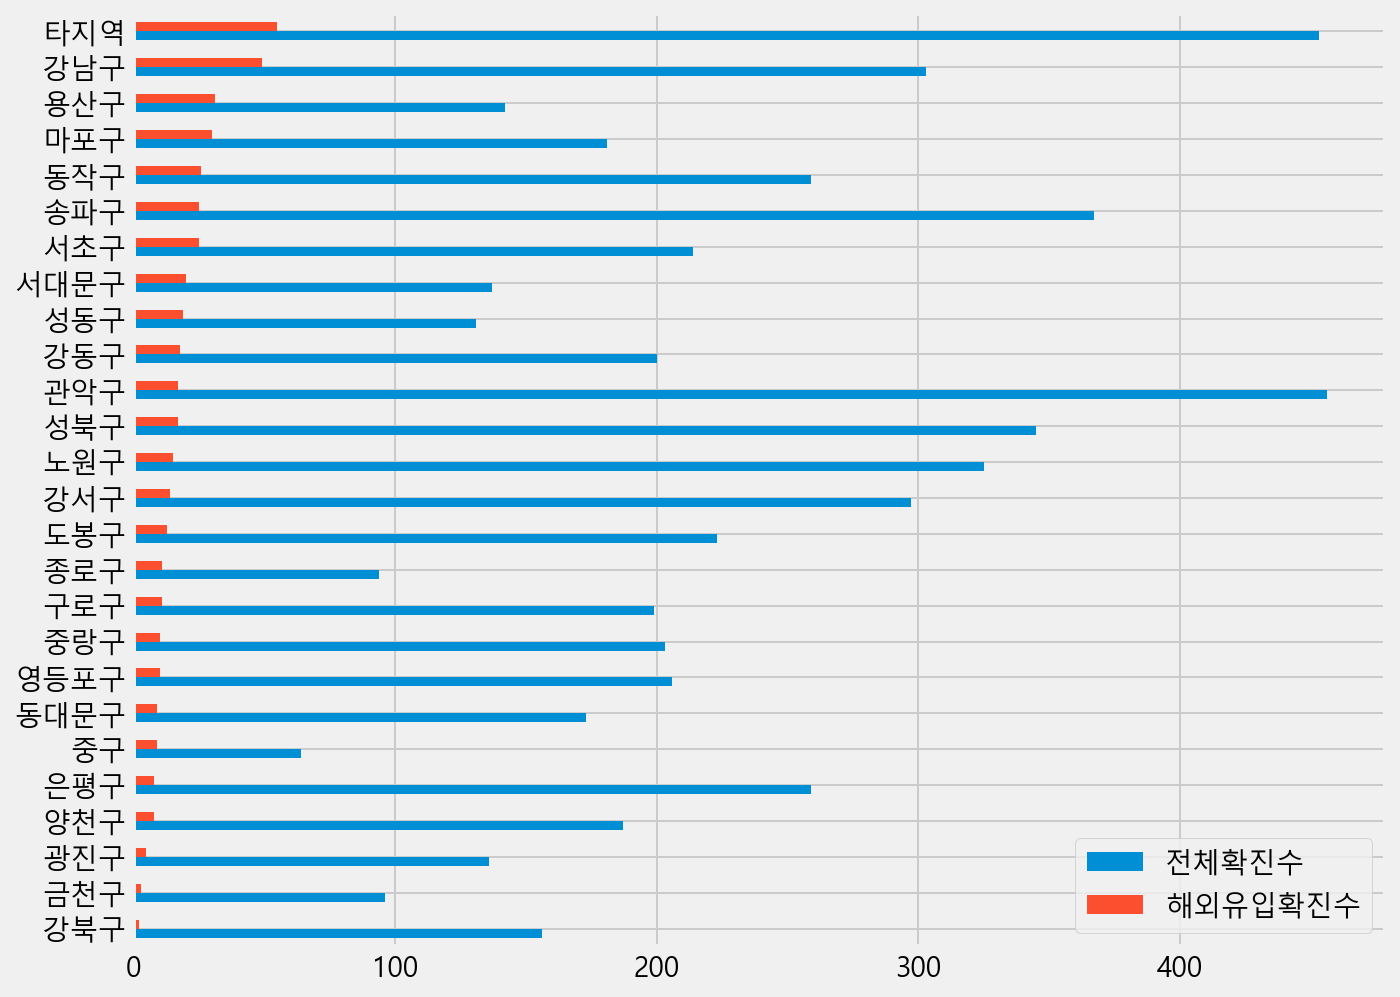

In [728]:
# 시각화하기
df_all_oversea_case.sort_values(by='해외유입확진수').plot.barh(figsize=(10,8))

In [734]:
# df_all_oversea_case["해외유입비율"] 구하기
df_all_oversea_case["해외유입비율"] = (df_all_oversea_case["해외유입확진수"] / df_all_oversea_case["전체확진수"]) *100
df_all_oversea_case.sort_values(by=["해외유입비율", "해외유입확진수"], ascending=False)

,전체확진수,해외유입확진수,해외유입비율
용산구,142,31,21.830986
마포구,181,30,16.574586
강남구,303,49,16.171617
서대문구,137,20,14.598540
성동구,131,19,14.503817
중구,64,9,14.062500
타지역,453,55,12.141280
종로구,94,11,11.702128
서초구,214,25,11.682243
동작구,259,26,10.038610


**[23/25] 월별 해외 확진자 수 추이는?**

### 13.6 해외유입 확진자 중 퇴원 여부

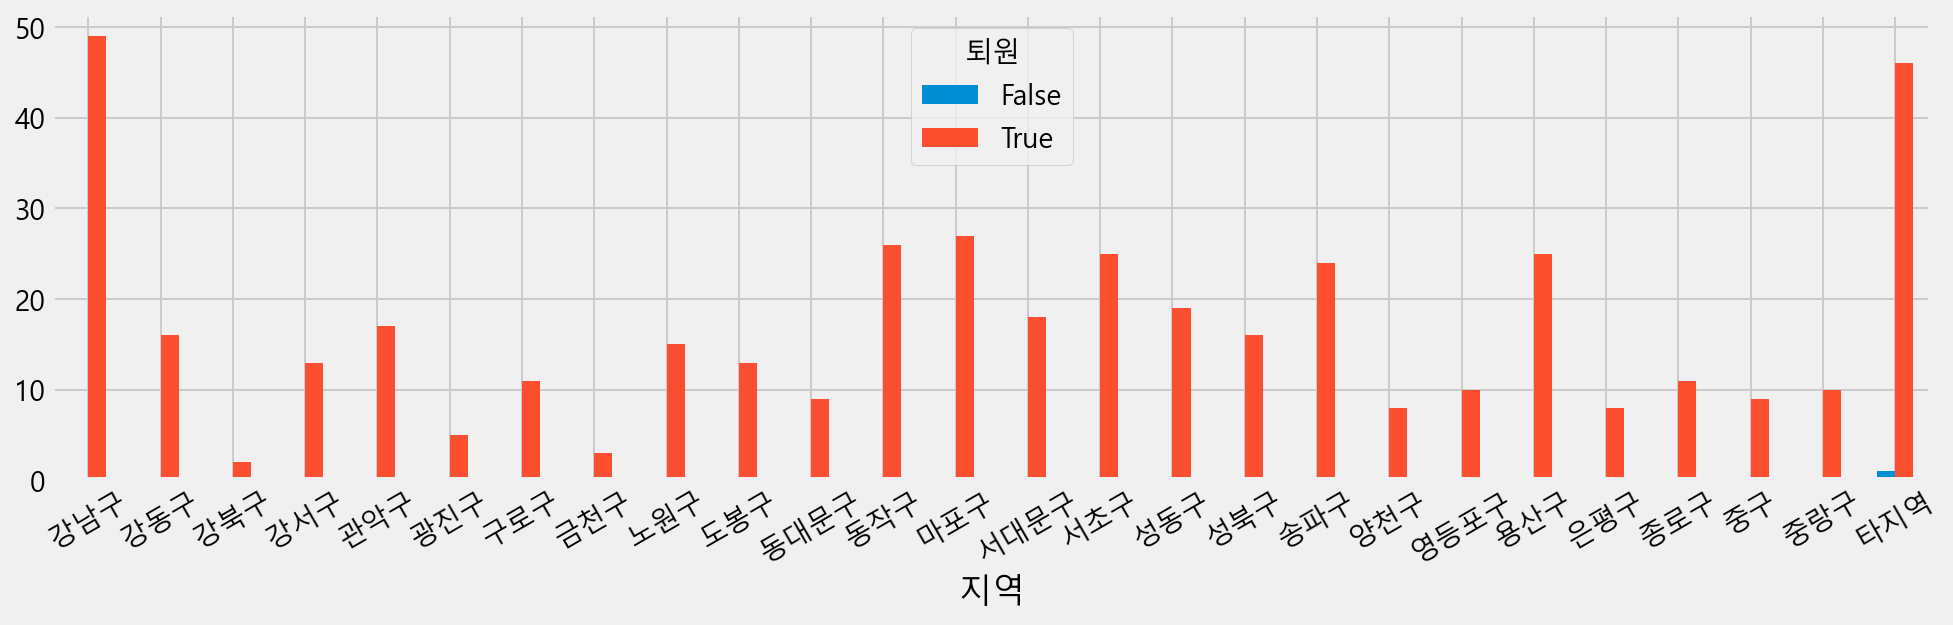

In [746]:
# oversea_finishi_count 해외유입 확진자 중 퇴원 여부 구하기
oversea_finishi_count = df_oversea.groupby(["지역", "퇴원"])["연번"].count().unstack()
# unstack()
oversea_finishi_count = oversea_finishi_count.fillna(0).astype(int)
oversea_finishi_count.plot.bar(figsize=(15,4), rot=30)

### 13.7 월별 해외 확진자 수

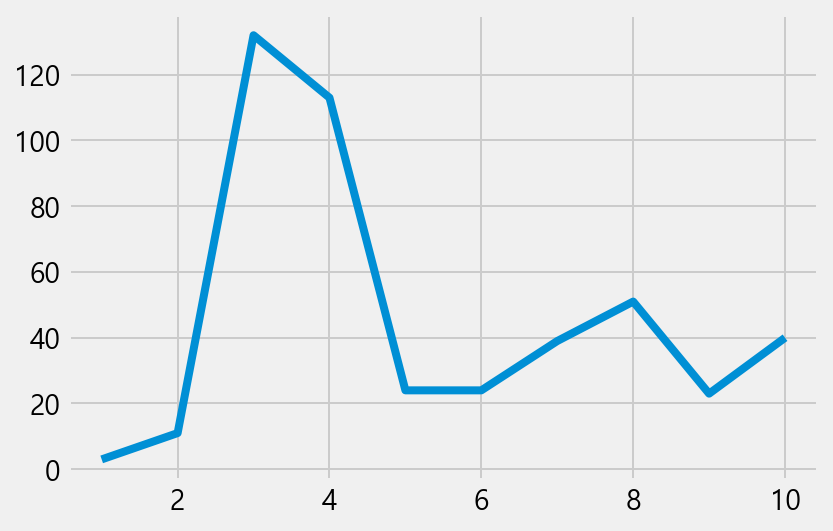

In [754]:
oversea_monthly_case = df_oversea["월"].value_counts()
oversea_monthly_case.sort_index().plot()

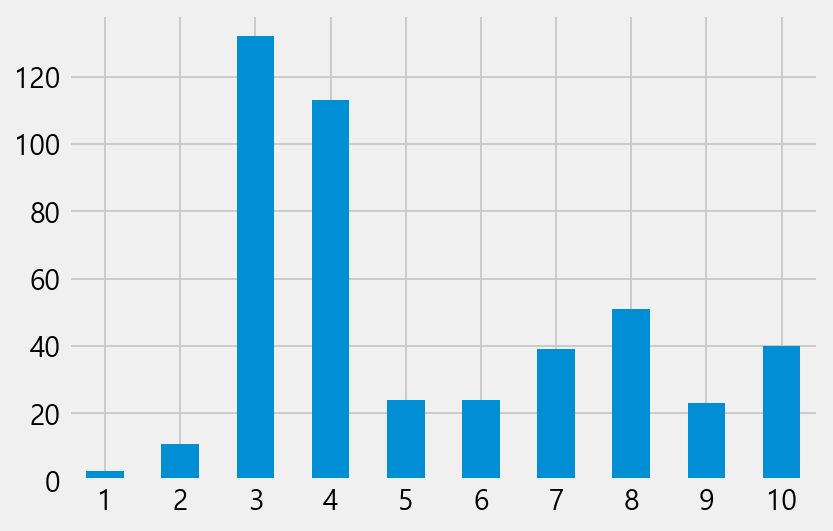

In [755]:
oversea_monthly_case.sort_index().plot.bar(rot=0)

**[24/25] groupby vs crosstab vs pivot vs pivot_table 의 차이는?**

###  13.8 구와 월별 해외 확진자 수
* groupby, crosstab, pivot_table 로 같은 결과의 테이블이 나오도록 구합니다.

#### 13.8.1 groupby 로 빈도수 구하기

In [760]:
# unstack -- 마지막 값을 컬럼으로 피봇해준다.
month_gu = df_oversea.groupby(["월","지역"])["연번"].count().unstack()
month_gu = month_gu.fillna(0).astype(int)
month_gu.style.background_gradient(cmap="Greens")

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


In [763]:
# 행, 열 바꿔보기
month_gu.T.style.background_gradient(cmap="Greens")

월,1,2,3,4,5,6,7,8,9,10
지역,,,,,,,,,,
강남구,0,2,21,16,2,0,0,1,4,3
강동구,0,1,4,1,2,2,4,0,1,3
강북구,0,0,1,0,1,0,0,0,0,0
강서구,1,1,3,2,2,0,1,2,0,2
관악구,0,0,6,5,1,2,1,2,0,0
광진구,0,1,3,0,0,0,0,1,0,0
구로구,0,0,9,0,0,1,0,0,0,1
금천구,0,0,3,0,0,0,0,0,0,0
노원구,0,0,3,2,2,2,2,2,1,1


#### 13.8.2 crosstab 으로 빈도수 구하기

In [766]:
month_gu = pd.crosstab(df_oversea["월"], df_oversea["지역"])
month_gu.style.bar()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


#### 13.8.3 pivot_table 로 빈도수 구하기

In [773]:
# 안 잘리게 보는 법
pd.options.display.max_columns = 30

In [772]:
# 연산 할거면 values 지정해야 한다.
month_gu = pd.pivot_table(df_oversea, index="월", columns="지역", values="연번",
                          aggfunc="count", fill_value=0)
month_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
월,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,2
3,21,4,1,3,6,3,9,3,3,4,1,12,4,1,10,2,5,9,1,3,6,3,2,3,5,8
4,16,1,0,2,5,0,0,0,2,3,5,5,7,5,8,12,6,8,1,5,5,2,2,0,2,11
5,2,2,1,2,1,0,0,0,2,2,0,0,1,2,0,1,0,1,0,0,6,0,1,0,0,0
6,0,2,0,0,2,0,1,0,2,0,1,0,0,2,2,1,0,1,3,1,0,2,1,1,1,1
7,0,4,0,1,1,0,0,0,2,1,0,1,7,6,1,2,2,0,0,0,2,0,2,2,1,4
8,1,0,0,2,2,1,0,0,2,3,2,4,2,0,1,0,3,3,1,0,5,1,1,3,0,14
9,4,1,0,0,0,0,0,0,1,0,0,4,1,1,1,1,0,0,2,0,0,0,0,0,0,7


### 13.9 해외유입이 많은 지역

In [783]:
# 해외유입이 많은 상위 10개 지역을 구합니다.
# top_oversea_gu

top_oversea_gu = df_oversea["지역"].value_counts().head().index

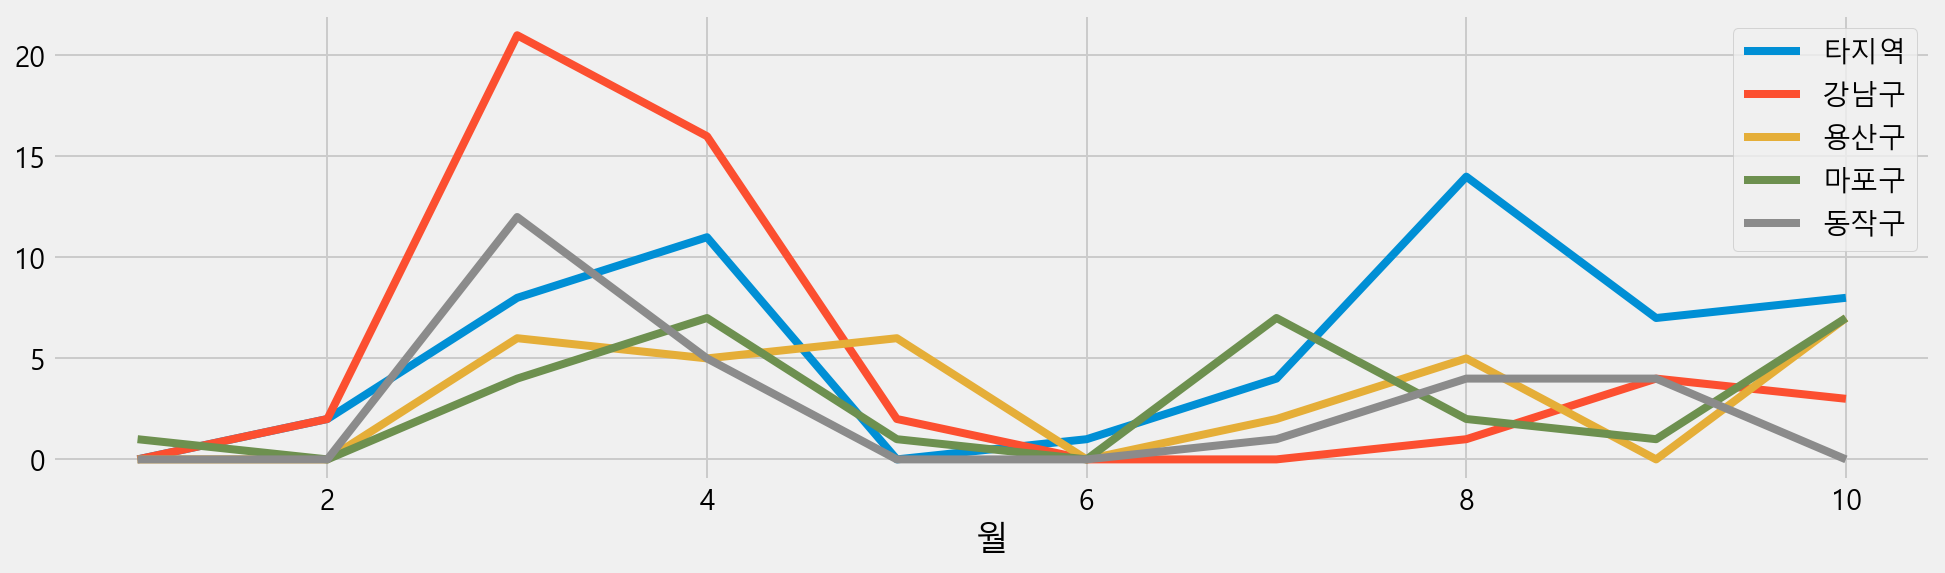

In [784]:
# 시각화 하기
g = month_gu[top_oversea_gu].plot(figsize=(15,4))
g.legend(loc=1)

**[25/25] 국가별, 구별 해외 유입은 얼마나 차이가 있을까요?**

### 13.9 구별 해외유입 국가 분석하기

#### 13.9.1 groupby 로 구하기

In [791]:
group_oversea = df_oversea.groupby(["해외", "지역"])["연번"].count().unstack()
group_oversea.fillna(0).astype(int)

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,4,1,0,0,2,0,0,0,1,0,1,3,3,2,0,0,0,2,0,0,2,0,0,1,0,4
네팔,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
러시아,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
몰타,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,29,5,1,5,4,1,7,1,2,6,3,7,5,5,13,10,10,8,2,1,7,2,2,1,4,14


#### 13.9.2 pivot table 로 구하기
* groupby 로 구한 결과와 같은 결과가 나오게 구합니다.

In [794]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", aggfunc="count", fill_value=0)
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
UAE,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
나이지리아,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
남미,4,1,0,0,2,0,0,0,1,0,1,3,3,2,0,0,0,2,0,0,2,0,0,1,0,4
네팔,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
러시아,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,0
말레이시아,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
몰타,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
미국,29,5,1,5,4,1,7,1,2,6,3,7,5,5,13,10,10,8,2,1,7,2,2,1,4,14


####  13.9.3 일부 구만 따로 보기
* 전체는 너무 많기 때문에 특정 구만 따로 봅니다.

In [800]:
# 강남 3구의 입국자는 해외 어느 지역에서 입국했나?
group_oversea_gu.loc[["미국", "유럽", "남미", "중국"],["강남구", "서초구", "송파구"]]

지역,강남구,서초구,송파구
해외,,,
미국,29,13,8
유럽,10,9,9
남미,4,0,2
중국,0,0,0


In [802]:
group_oversea_gu = df_oversea.pivot_table(index="해외", columns="지역", values="연번", aggfunc="count")
group_oversea_gu.style.background_gradient()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타지역
해외,,,,,,,,,,,,,,,,,,,,,,,,,,
21263,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
UAE,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,1.000000,nan,nan,nan,1.000000,1.000000,nan,nan,nan,nan,nan,1.000000,nan
나이지리아,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan
남미,4.000000,1.000000,nan,nan,2.000000,nan,nan,nan,1.000000,nan,1.000000,3.000000,3.000000,2.000000,nan,nan,nan,2.000000,nan,nan,2.000000,nan,nan,1.000000,nan,4.000000
네팔,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3.000000
러시아,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.000000,1.000000,nan
말레이시아,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
몰타,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
미국,29.000000,5.000000,1.000000,5.000000,4.000000,1.000000,7.000000,1.000000,2.000000,6.000000,3.000000,7.000000,5.000000,5.000000,13.000000,10.000000,10.000000,8.000000,2.000000,1.000000,7.000000,2.000000,2.000000,1.000000,4.000000,14.000000


In [806]:
# top_oversea_gu 에 따른 확진수 보기
# how 넣으면 하나라도 값 있으면 데려온다.
group_oversea_gu[top_oversea_gu].dropna(how="all").fillna(0).astype(int)

지역,타지역,강남구,용산구,마포구,동작구
해외,,,,,
남미,4,4,2,3,3
네팔,3,0,0,0,0
러시아,0,1,0,1,0
몰타,0,0,0,1,0
미국,14,29,7,5,7
방글라데시,1,1,0,0,1
베트남,0,0,0,0,2
사우디아라비아,2,0,0,0,0
에티오피아,1,0,0,0,0


### 13.10 최근 데이터를 불러와 실습해보기
* 이 실습을 진행하고 계신 여러분들은 이 시점보다 미래에 있겠죠?
* 같은 내용의 실습을 최근 데이터로 해보세요!